In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sn
import matplotlib.pyplot as plt
# from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('spotify_data.csv')

# Data Preparation

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3441197 entries, 0 to 3441196
Data columns (total 7 columns):
 #   Column      Dtype 
---  ------      ----- 
 0   Position    int64 
 1   Track Name  object
 2   Artist      object
 3   Streams     int64 
 4   URL         object
 5   Date        object
 6   Region      object
dtypes: int64(2), object(5)
memory usage: 183.8+ MB


In [4]:
data.describe()

Position       Streams
count  3.441197e+06  3.441197e+06
mean   9.464399e+01  5.189176e+04
std    5.739567e+01  2.018035e+05
min    1.000000e+00  1.001000e+03
25%    4.500000e+01  3.322000e+03
50%    9.200000e+01  9.227000e+03
75%    1.430000e+02  2.965800e+04
max    2.000000e+02  1.138152e+07

In [5]:
data.isna().sum()

Position        0
Track Name    657
Artist        657
Streams         0
URL             8
Date            0
Region          0
dtype: int64

In [6]:
data.dropna(inplace = True)
data.isna().sum()

Position      0
Track Name    0
Artist        0
Streams       0
URL           0
Date          0
Region        0
dtype: int64

In [7]:
data['TrackID'] = data['URL'].apply(lambda x: str(x).split('/')[-1])
data.head(n=5)

Position                  Track Name         Artist  Streams  \
0         1  Reggaetón Lento (Bailemos)           CNCO    19272   
1         2                    Chantaje        Shakira    19270   
2         3   Otra Vez (feat. J Balvin)  Zion & Lennox    15761   
3         4                Vente Pa' Ca   Ricky Martin    14954   
4         5                      Safari       J Balvin    14269   

                                                 URL        Date Region  \
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec   
1  https://open.spotify.com/track/6mICuAdrwEjh6Y6...  2017-01-01     ec   
2  https://open.spotify.com/track/3QwBODjSEzelZyV...  2017-01-01     ec   
3  https://open.spotify.com/track/7DM4BPaS7uofFul...  2017-01-01     ec   
4  https://open.spotify.com/track/6rQSrBHf7HlZjtc...  2017-01-01     ec   

                  TrackID  
0  3AEZUABDXNtecAOSC1qTfo  
1  6mICuAdrwEjh6Y6lroV2Kg  
2  3QwBODjSEzelZyVjxPOHdq  
3  7DM4BPaS7uofFul3ywMe46  
4  6rQSrBHf7HlZjtcMZ4S4bO

In [8]:
data['TrackID'].unique().shape

(21738,)

In [9]:
track_ids = pd.DataFrame(data['TrackID'].unique(),columns = ['TrackID'])

Adding New Features

In [ ]:
import spotipy 

CLIENT_ID = '7b539c8f38864871b86d4740d3cbdeab'
CLIENT_SECRET = '634c6ae8e1ae4e34a5df4ff547edd024'

from spotipy.oauth2 import SpotifyClientCredentials
client_credentials_manager = SpotifyClientCredentials(client_id=CLIENT_ID, client_secret=CLIENT_SECRET)
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

features = ['tempo','key','loudness','danceability','energy','valence']
track_features = []
row_data = {}
for t_id in track_ids['TrackID']:
    af = sp.audio_features(t_id)

    if(af[0] is None):
        continue
    for key in features:
        row_data[key] = af[0][key]
    row_data['TrackID'] = t_id
    track_features.append(row_data)
    row_data = {}
tf_df = pd.DataFrame(columns = ['tempo','key','loudness','danceability','energy','valence'])
for item in track_features:
    tf_df = tf_df.append(item, ignore_index=True)

tf_df.head()


In [ ]:
new_features = pd.merge(data, tf_df, how='inner', left_on='TrackID', right_on='id')
new_features.to_csv('spotify_features.csv')


Reading New Dataset created with additional features

In [10]:
data_features = pd.read_csv('spotify_features.csv')

In [11]:
data_features.drop(['Unnamed: 0','Position'],axis = 1,inplace = True)
data_features.head(n=5)

Track Name Artist  Streams  \
0  Reggaetón Lento (Bailemos)   CNCO    19272   
1  Reggaetón Lento (Bailemos)   CNCO    16672   
2  Reggaetón Lento (Bailemos)   CNCO    17258   
3  Reggaetón Lento (Bailemos)   CNCO    18146   
4  Reggaetón Lento (Bailemos)   CNCO    17788   

                                                 URL        Date Region  \
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec   
1  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-02     ec   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-03     ec   
3  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-04     ec   
4  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-05     ec   

                  TrackID  danceability  energy  key  ...  liveness  valence  \
0  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.176     0.71   
1  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.176     0.71   
2  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.176     0.71   
3  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.176     0.71   
4  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.176     0.71   

    tempo            type                      id  \
0  93.974  audio_features  3AEZUABDXNtecAOSC1qTfo   
1  93.974  audio_features  3AEZUABDXNtecAOSC1qTfo   
2  93.974  audio_features  3AEZUABDXNtecAOSC1qTfo   
3  93.974  audio_features  3AEZUABDXNtecAOSC1qTfo   
4  93.974  audio_features  3AEZUABDXNtecAOSC1qTfo   

                                    uri  \
0  spotify:track:3AEZUABDXNtecAOSC1qTfo   
1  spotify:track:3AEZUABDXNtecAOSC1qTfo   
2  spotify:track:3AEZUABDXNtecAOSC1qTfo   
3  spotify:track:3AEZUABDXNtecAOSC1qTfo   
4  spotify:track:3AEZUABDXNtecAOSC1qTfo   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
1  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
2  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
3  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
4  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   

                                        analysis_url duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3AEZ...      222560   
1  https://api.spotify.com/v1/audio-analysis/3AEZ...      222560   
2  https://api.spotify.com/v1/audio-analysis/3AEZ...      222560   
3  https://api.spotify.com/v1/audio-analysis/3AEZ...      222560   
4  https://api.spotify.com/v1/audio-analysis/3AEZ...      222560   

  time_signature  
0              4  
1              4  
2              4  
3              4  
4              4  

[5 rows x 25 columns]

Finding popularity score for tracks


In [12]:
popularityDict = {}
streams =0
for i in data_features.index:

    song = data_features['Track Name'][i]
    if song in popularityDict:
        region = data_features['Region'][i]
        streams = data_features['Streams'][i]
        date = data_features['Date'][i]
        if(region in popularityDict[song][0]):
            popularityDict[song][0][region][0] += streams
            popularityDict[song][0][region][1] +=1
        else:
            strem_freq = []
            strem_freq.append(streams)
            strem_freq.append(1)
            popularityDict[song][0][region] = strem_freq
        if(date in popularityDict[song][1]):
            pass
        else:
            popularityDict[song][1].append(date)
        

    else:
        strem_freq = []
        regionDict = {}
        dates = []
        dates.append(data_features['Date'][i])

        strem_freq.append(data_features['Streams'][i])
        strem_freq.append(1)
        regionDict[data_features['Region'][i]] = strem_freq

        info = []
        info.append(regionDict)
        info.append(dates)
        popularityDict[data_features['Track Name'][i]] = info
        


In [13]:
popularityIndex ={}
for song in popularityDict.keys():

    popularity_score = 0
    for region in popularityDict[song][0].keys():
        popularity_score = (popularityDict[song][0][region][0]/popularityDict[song][0][region][1])* len(popularityDict[song][1])
        song_region = song + '-_-' + region
        popularityIndex[song_region] = popularity_score
   

In [14]:
def f(x,y):
    return popularityIndex[x+'-_-'+y]

data_features['Track_Popularity'] = data_features.apply(lambda x: f(x['Track Name'],x['Region']), axis=1)

data_features.sort_values(by=['Track Name'], ascending=False)

data_features.head(10)

Track Name Artist  Streams  \
0  Reggaetón Lento (Bailemos)   CNCO    19272   
1  Reggaetón Lento (Bailemos)   CNCO    16672   
2  Reggaetón Lento (Bailemos)   CNCO    17258   
3  Reggaetón Lento (Bailemos)   CNCO    18146   
4  Reggaetón Lento (Bailemos)   CNCO    17788   
5  Reggaetón Lento (Bailemos)   CNCO    18579   
6  Reggaetón Lento (Bailemos)   CNCO    21438   
7  Reggaetón Lento (Bailemos)   CNCO    20146   
8  Reggaetón Lento (Bailemos)   CNCO    16652   
9  Reggaetón Lento (Bailemos)   CNCO    16595   

                                                 URL        Date Region  \
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec   
1  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-02     ec   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-03     ec   
3  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-04     ec   
4  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-05     ec   
5  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-06     ec   
6  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-07     ec   
7  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-08     ec   
8  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-09     ec   
9  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-10     ec   

                  TrackID  danceability  energy  key  ...  valence   tempo  \
0  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
1  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
2  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
3  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
4  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
5  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
6  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
7  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
8  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   
9  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...     0.71  93.974   

             type                      id  \
0  audio_features  3AEZUABDXNtecAOSC1qTfo   
1  audio_features  3AEZUABDXNtecAOSC1qTfo   
2  audio_features  3AEZUABDXNtecAOSC1qTfo   
3  audio_features  3AEZUABDXNtecAOSC1qTfo   
4  audio_features  3AEZUABDXNtecAOSC1qTfo   
5  audio_features  3AEZUABDXNtecAOSC1qTfo   
6  audio_features  3AEZUABDXNtecAOSC1qTfo   
7  audio_features  3AEZUABDXNtecAOSC1qTfo   
8  audio_features  3AEZUABDXNtecAOSC1qTfo   
9  audio_features  3AEZUABDXNtecAOSC1qTfo   

                                    uri  \
0  spotify:track:3AEZUABDXNtecAOSC1qTfo   
1  spotify:track:3AEZUABDXNtecAOSC1qTfo   
2  spotify:track:3AEZUABDXNtecAOSC1qTfo   
3  spotify:track:3AEZUABDXNtecAOSC1qTfo   
4  spotify:track:3AEZUABDXNtecAOSC1qTfo   
5  spotify:track:3AEZUABDXNtecAOSC1qTfo   
6  spotify:track:3AEZUABDXNtecAOSC1qTfo   
7  spotify:track:3AEZUABDXNtecAOSC1qTfo   
8  spotify:track:3AEZUABDXNtecAOSC1qTfo   
9  spotify:track:3AEZUABDXNtecAOSC1qTfo   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
1  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
2  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
3  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
4  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
5  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
6  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
7  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
8  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
9  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3AEZ...       222560   
1  https://api.spotify.com/v1/audio-analysis/3AEZ...       222560   


In [15]:

artists = data_features['Artist'].unique()
type(artists)


track_names = data_features['Track Name'].unique()
track_names.shape

artists_encoded = {}
encode = 0
for artist in artists:
    artists_encoded[artist] = encode
    encode += 1



data_features['Artist_encoded'] = data_features['Artist'].apply(lambda x: artists_encoded[x])

track_encoded = {}
encode = 0
for track in track_names:
    track_encoded[track] = encode
    encode += 1

data_features['TrackName_encoded'] = data_features['Track Name'].apply(lambda x: track_encoded[x])

region_names = data_features['Region'].unique()
region_encode={}
encode =0
for region in region_names:
    region_encode[region] = encode
    encode+=1
    
data_features['Region_encoded'] = data_features['Region'].apply(lambda x: region_encode[x])     

In [16]:
data_features.head()

Track Name Artist  Streams  \
0  Reggaetón Lento (Bailemos)   CNCO    19272   
1  Reggaetón Lento (Bailemos)   CNCO    16672   
2  Reggaetón Lento (Bailemos)   CNCO    17258   
3  Reggaetón Lento (Bailemos)   CNCO    18146   
4  Reggaetón Lento (Bailemos)   CNCO    17788   

                                                 URL        Date Region  \
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec   
1  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-02     ec   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-03     ec   
3  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-04     ec   
4  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-05     ec   

                  TrackID  danceability  energy  key  ...  \
0  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...   
1  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...   
2  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...   
3  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...   
4  3AEZUABDXNtecAOSC1qTfo         0.761   0.838    4  ...   

                       id                                   uri  \
0  3AEZUABDXNtecAOSC1qTfo  spotify:track:3AEZUABDXNtecAOSC1qTfo   
1  3AEZUABDXNtecAOSC1qTfo  spotify:track:3AEZUABDXNtecAOSC1qTfo   
2  3AEZUABDXNtecAOSC1qTfo  spotify:track:3AEZUABDXNtecAOSC1qTfo   
3  3AEZUABDXNtecAOSC1qTfo  spotify:track:3AEZUABDXNtecAOSC1qTfo   
4  3AEZUABDXNtecAOSC1qTfo  spotify:track:3AEZUABDXNtecAOSC1qTfo   

                                          track_href  \
0  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
1  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
2  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
3  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   
4  https://api.spotify.com/v1/tracks/3AEZUABDXNte...   

                                        analysis_url  duration_ms  \
0  https://api.spotify.com/v1/audio-analysis/3AEZ...       222560   
1  https://api.spotify.com/v1/audio-analysis/3AEZ...       222560   
2  https://api.spotify.com/v1/audio-analysis/3AEZ...       222560   
3  https://api.spotify.com/v1/audio-analysis/3AEZ...       222560   
4  https://api.spotify.com/v1/audio-analysis/3AEZ...       222560   

   time_signature  Track_Popularity  Artist_encoded TrackName_encoded  \
0               4         3173419.0               0                 0   
1               4         3173419.0               0                 0   
2               4         3173419.0               0                 0   
3               4         3173419.0               0                 0   
4               4         3173419.0               0                 0   

  Region_encoded  
0              0  
1              0  
2              0  
3              0  
4              0  

[5 rows x 29 columns]

In [17]:
data_features.drop(['mode', 'speechiness','acousticness', 'instrumentalness', 'liveness','type', 'id', 'uri', 'track_href', 'analysis_url','time_signature' ],inplace=True,axis=1)


# Exploratory Data Analysis and Dimensionality Reduction

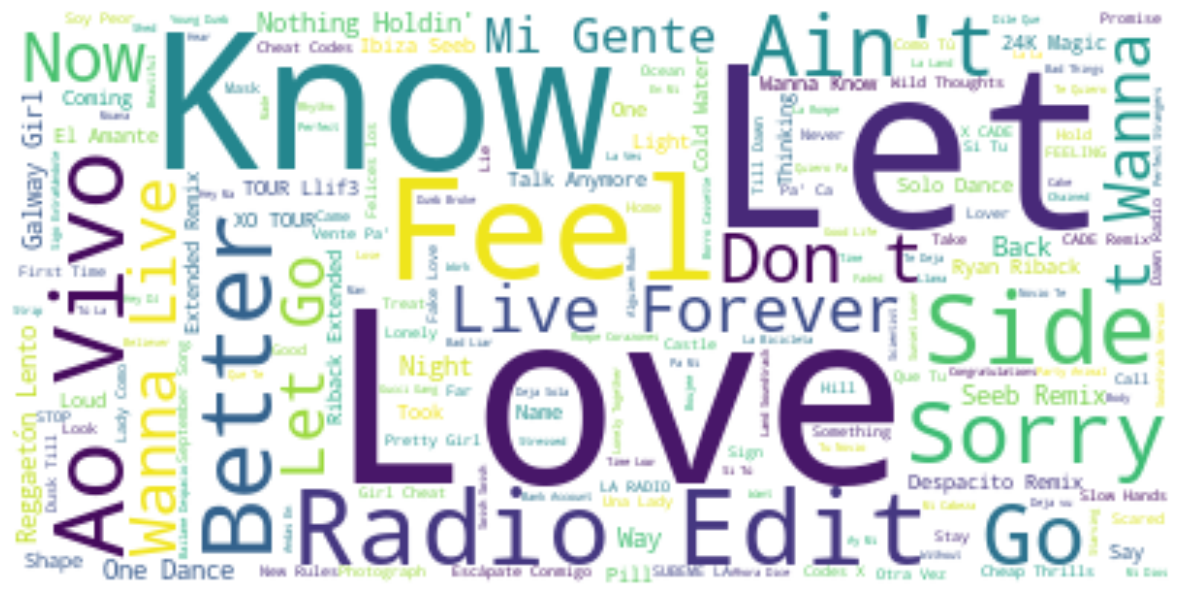

In [18]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

text = " ".join(str(i).split('(')[0] for i in data['Track Name'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



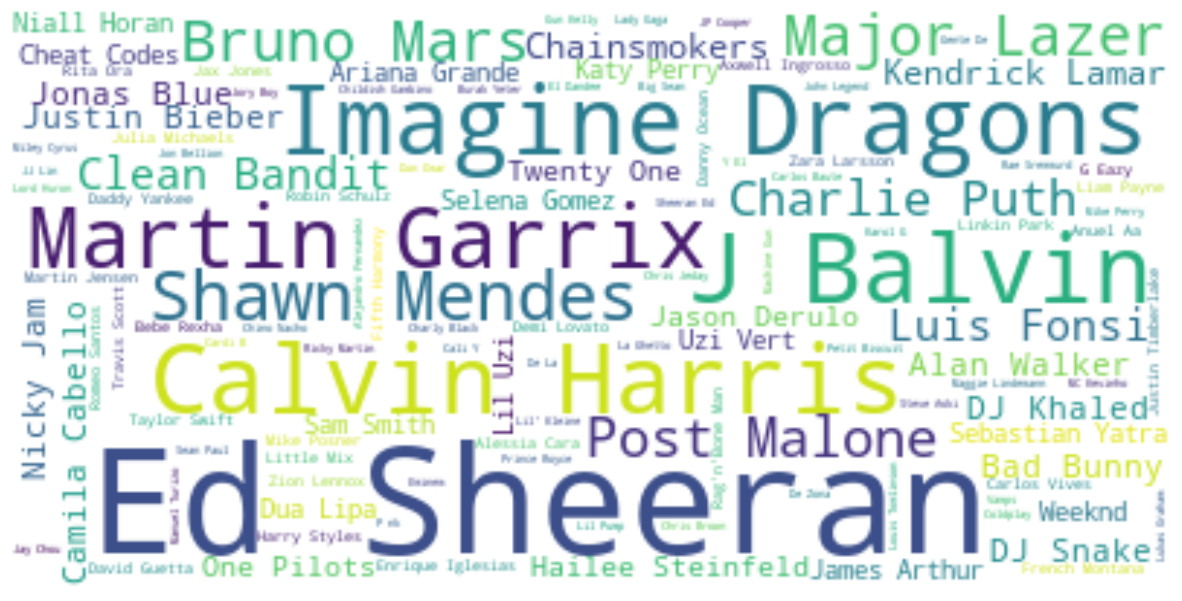

In [19]:
text = " ".join(str(i) for i in data['Artist'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

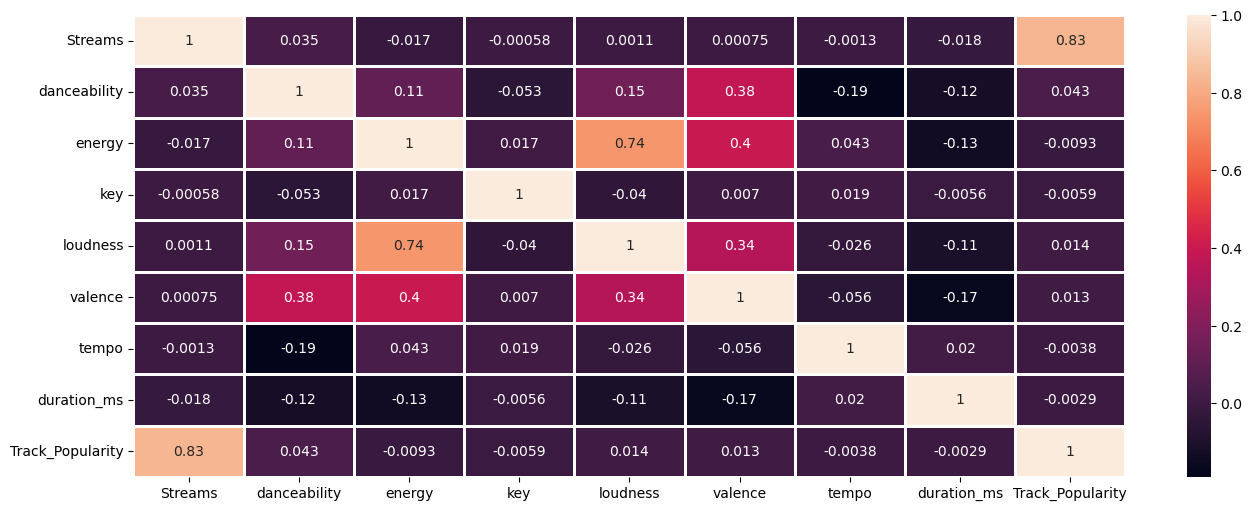

In [20]:
data_corr = data_features.drop(['Artist_encoded','TrackName_encoded', 'Region_encoded'],axis = 1)



import seaborn as sn
import matplotlib.pyplot as plt
corr_matrix = data_corr.corr()
corr_plot = plt.figure(figsize=(16,6))

corr2 = sns.heatmap(corr_matrix, annot=True,linewidths=1)

corr_plot.savefig('corrMatFeatures.jpeg',bbox_inches = 'tight')
plt.show()





In [21]:
data_features.drop('energy',axis=1,inplace=True) 


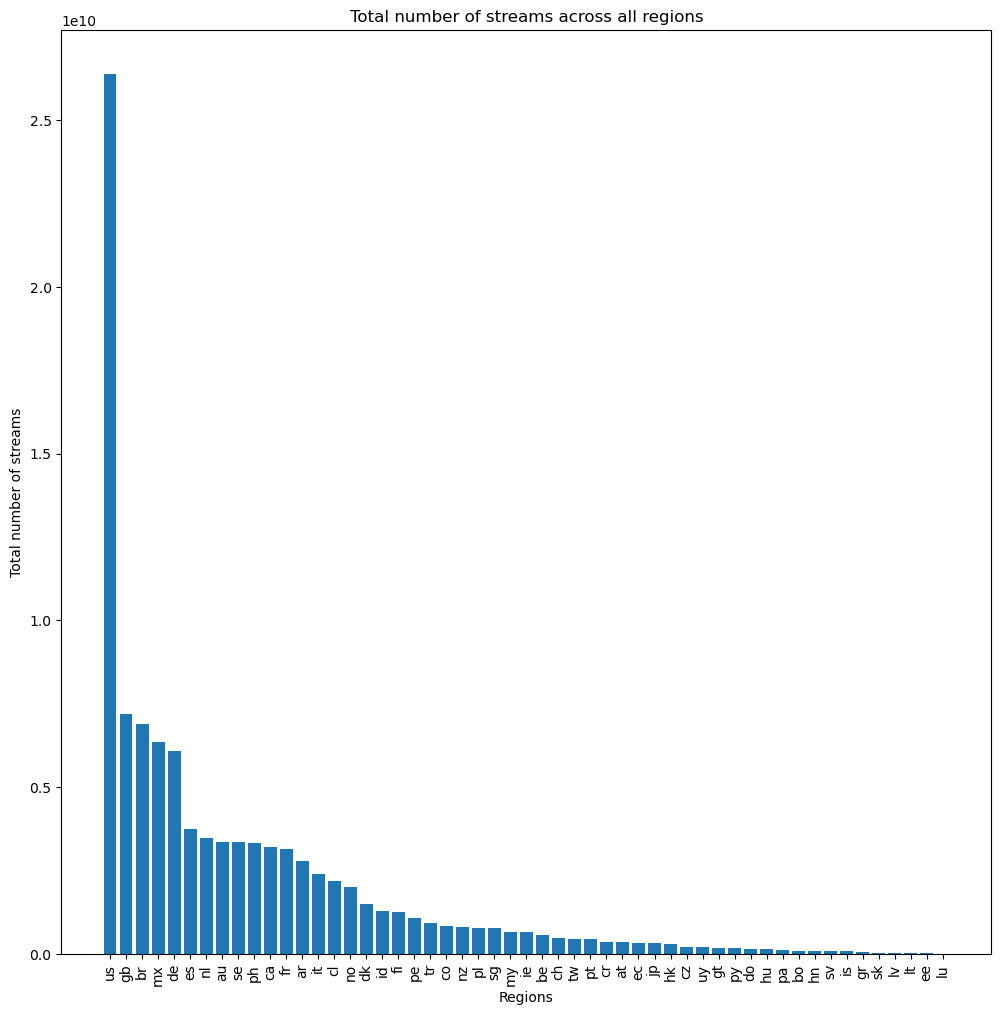

<Figure size 640x480 with 0 Axes>

In [22]:
regions_group = data.groupby(['Region'])[['Streams']].sum().sort_values(by=['Streams'], ascending=False)
regions_group = regions_group.reset_index()

regions_group = regions_group[regions_group['Region'] != 'global']



plt.figure(figsize=(12,12))
plt.bar(regions_group['Region'],regions_group['Streams'])
plt.xticks(rotation=90)
plt.xlabel('Regions')
plt.ylabel('Total number of streams')
plt.title('Total number of streams across all regions')
plt.show()
plt.savefig('regions_plot.jpeg')

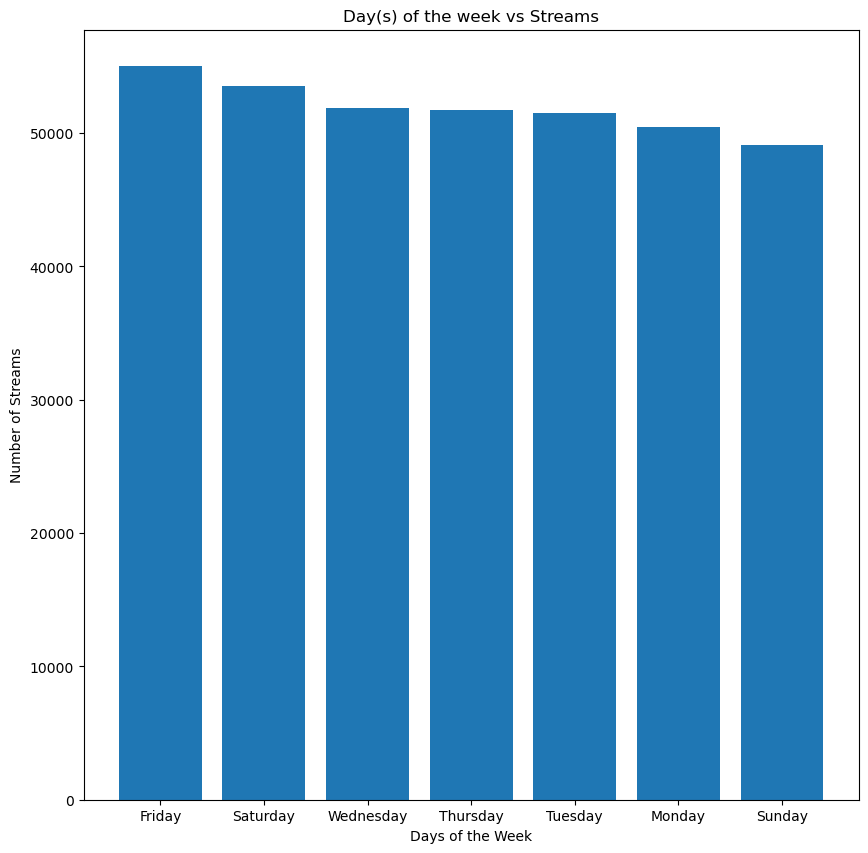

In [23]:
from datetime import datetime

week_number_new = datetime.strptime('2017-01-01','%Y-%m-%d')
# print(week_number_new.strftime("%W"))


data['week_day'] = data['Date'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d').weekday())
data['week_day'].unique()
week = data.groupby('week_day').mean().sort_values(['Streams'],ascending=False)['Streams']

week

streams = week.values
days = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

indexes = week.index.to_numpy()

bar_days = np.array([days[i] for i in indexes])
bar_days

plt.figure(figsize = (10,10))
plt.bar(bar_days,streams)
plt.xlabel('Days of the Week')
plt.ylabel('Number of Streams')
plt.title('Day(s) of the week vs Streams')
plt.savefig('week_day_plot.pdf')

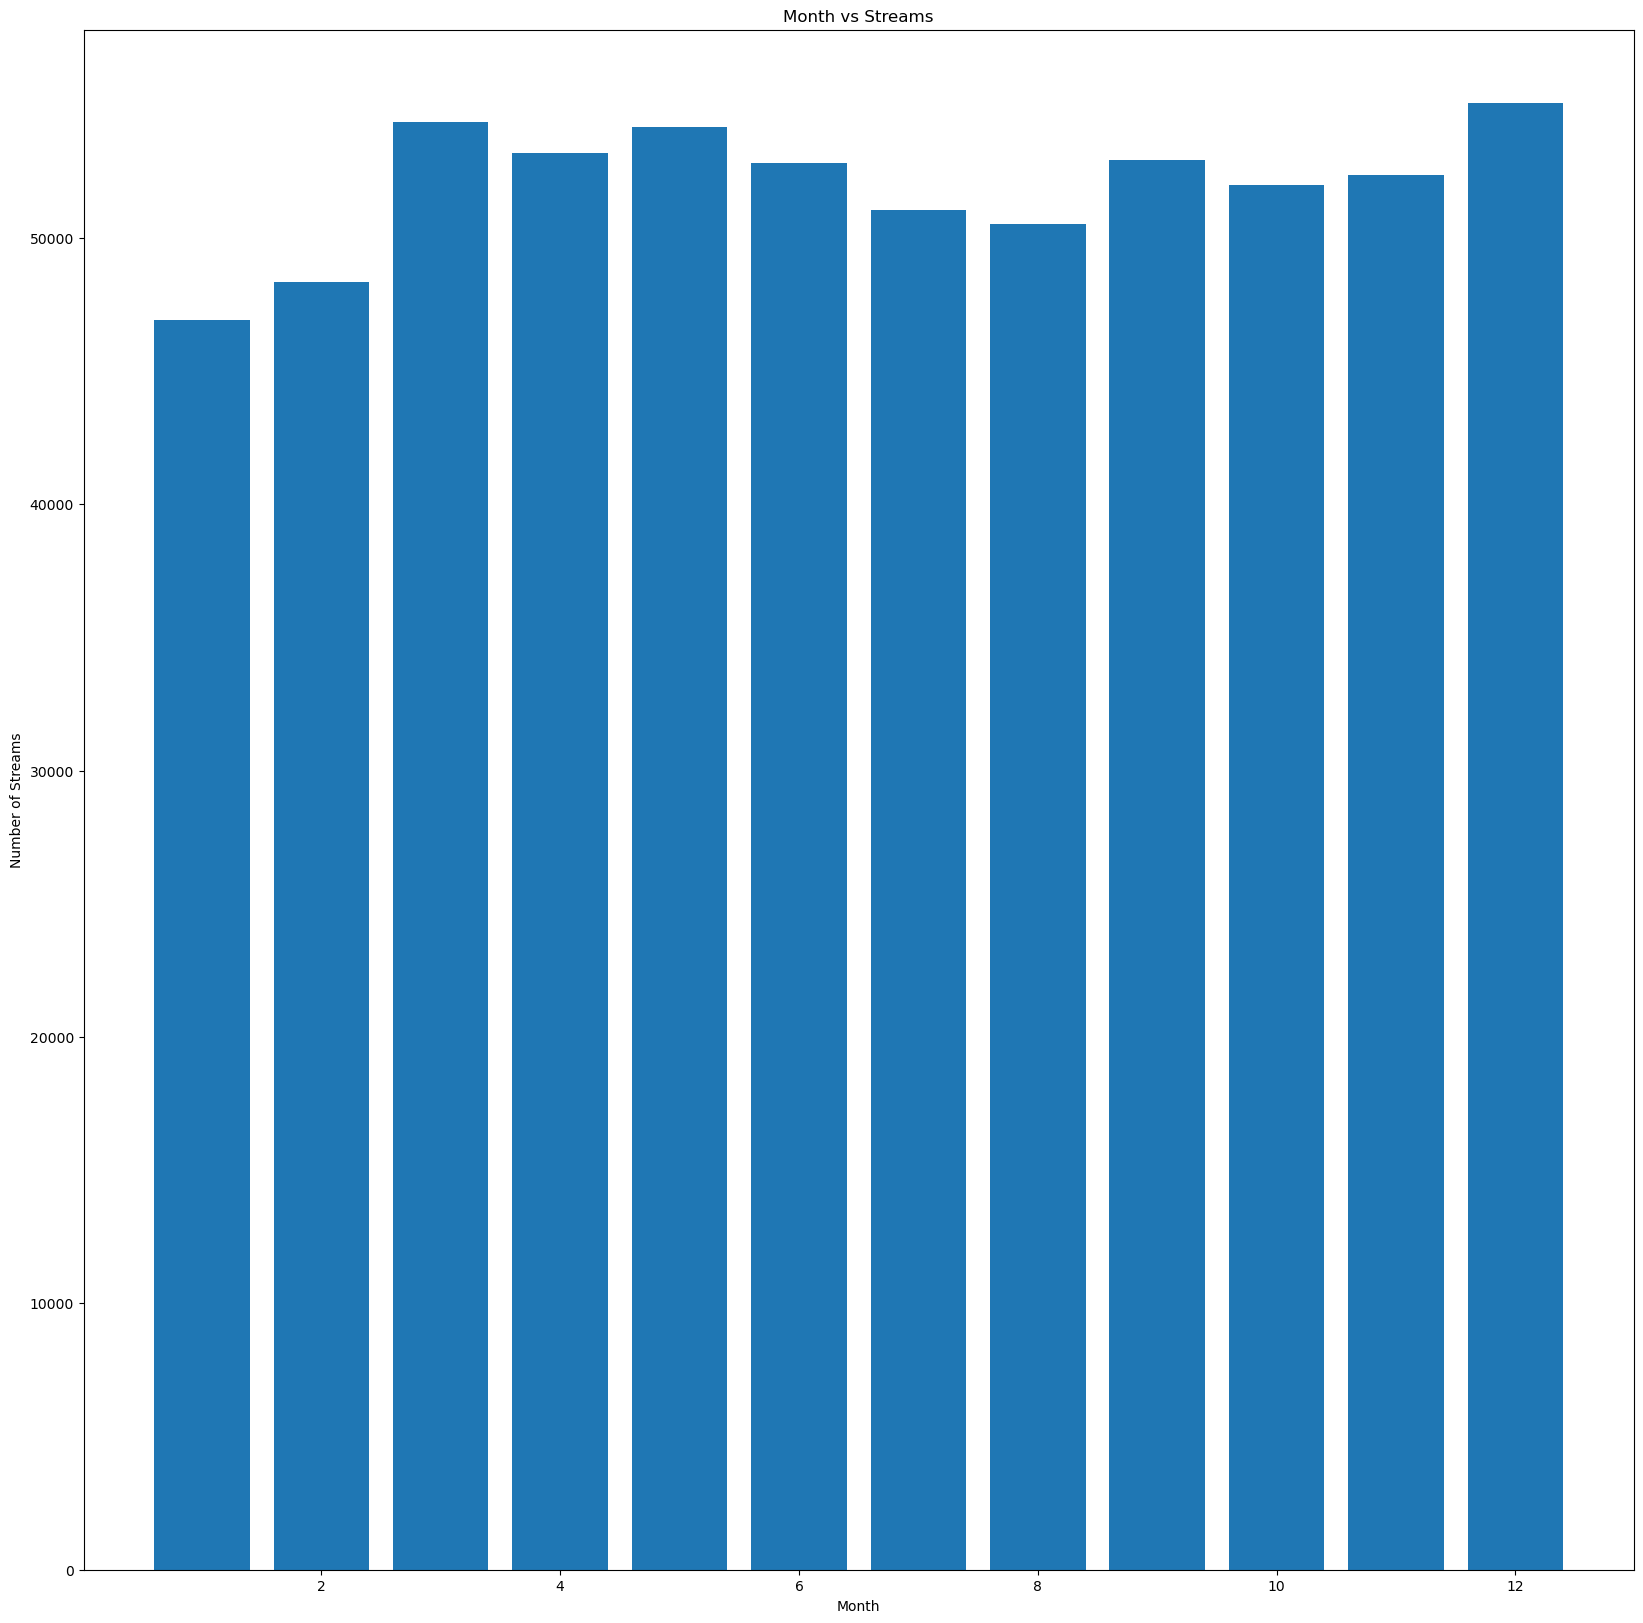

<Figure size 640x480 with 0 Axes>

In [24]:
data['Month'] = data['Date'].apply(lambda x: int(x.split('-')[1]))
month = data.groupby('Month').mean().sort_values(['Streams'],ascending=False)['Streams']
streams = month.values


indexes = month.index.to_numpy()


plt.figure(figsize = (20,20))

plt.bar(indexes,month)
plt.xlabel('Month')
plt.ylabel('Number of Streams')
plt.title('Month vs Streams')
plt.xticks()


plt.show()
plt.savefig('monthplot.pdf')

In [25]:
from datetime import datetime


curr_multiplier = 0
prev_week = 0

prev_weeks = set()

def week(x):
    global curr_multiplier,prev_week
    week_no = int(datetime.strptime(x,'%Y-%m-%d').strftime("%W"))
    if(week_no == 0):
        return 0
    if(week_no == 1 and prev_week == 52):
        curr_multiplier += 1
    prev_week = week_no
    prev_weeks.add(curr_multiplier)
    return ((curr_multiplier * 52) + week_no)


data['week'] = data['Date'].apply(week)


data['week']

weekly_chart = data.sort_values('week').groupby(['Track Name','week'])[['Streams']].sum().sort_values(['week','Streams'],ascending = [True,False])


weekly_chart = weekly_chart.reset_index()


weekly_chart

top_weekly_songs = {}

week_no = 0

weeks = weekly_chart['week'].unique()

for week in weeks:
    top_5 = weekly_chart[weekly_chart['week'] == week].sort_values('Streams',ascending = False).head(5)
    print(top_5)


                                Track Name  week  Streams
0                                  Starboy     0  6266206
1                                   Closer     0  6025657
2                          Let Me Love You     0  5158353
3  Rockabye (feat. Sean Paul & Anne-Marie)     0  4708748
4                                One Dance     0  4515560
                      Track Name  week  Streams
2327  Reggaetón Lento (Bailemos)     1   130027
2328                    Chantaje     1   119590
2329   Otra Vez (feat. J Balvin)     1   105091
2330                      Safari     1    89424
2331                Vente Pa' Ca     1    88532
                      Track Name  week  Streams
2558  Reggaetón Lento (Bailemos)     2   125831
2559                    Chantaje     2   114452
2560   Otra Vez (feat. J Balvin)     2   101373
2561                Shape of You     2    89979
2562                      Safari     2    86570
                              Track Name  week  Streams
2786  Despacito (Fea

              Track Name  week  Streams
59939  Despacito - Remix   231  1607264
59940            Fy Faen   231   939977
59941         Summer Air   231   897253
59942        I'm the One   231   855694
59943              Tired   231   762256
                     Track Name  week  Streams
60186         Despacito - Remix   232  1550581
60187  2U (feat. Justin Bieber)   232  1305032
60188                Summer Air   232  1000450
60189                   Fy Faen   232   913047
60190               I'm the One   232   799143
                     Track Name  week  Streams
60429         Despacito - Remix   233  1475213
60430  2U (feat. Justin Bieber)   233  1158527
60431                Summer Air   233  1014406
60432                   Fy Faen   233   872580
60433        More Than You Know   233   818593
                     Track Name  week  Streams
60674         Despacito - Remix   234  1427570
60675                Summer Air   234  1030132
60676  2U (feat. Justin Bieber)   234  1021796
60677   

                        Track Name  week  Streams
111574                      Wolves   463   203671
111575  What Lovers Do (feat. SZA)   463   144768
111576        Too Good At Goodbyes   463   142832
111577                      Havana   463   138072
111578                    How Long   463   126465
                        Track Name  week  Streams
111885                      Wolves   464   194865
111886  What Lovers Do (feat. SZA)   464   142930
111887        Too Good At Goodbyes   464   136541
111888                      Havana   464   133757
111889              All Falls Down   464   127025
                                 Track Name  week  Streams
112179                               Wolves   465   161968
112180  Perfect Duet (Ed Sheeran & Beyoncé)   465   134349
112181                          So Far Away   465   133668
112182           What Lovers Do (feat. SZA)   465   124549
112183                               Havana   465   119160
                                 Track Name  w

              Track Name  week  Streams
158086         Me Rehúso   702    43279
158087     Felices los 4   702    42903
158088  Escápate Conmigo   702    39602
158089        Ahora Dice   702    33941
158090  Una Lady Como Tú   702    33110
              Track Name  week  Streams
158205          Mi Gente   703    47911
158206         Me Rehúso   703    45881
158207     Felices los 4   703    44632
158208  Escápate Conmigo   703    43076
158209  Una Lady Como Tú   703    43006
              Track Name  week  Streams
158326          Mi Gente   704    54369
158327  Una Lady Como Tú   704    46460
158328         Me Rehúso   704    45480
158329     Felices los 4   704    43460
158330  Escápate Conmigo   704    43317
              Track Name  week  Streams
158456          Mi Gente   705    55392
158457  Una Lady Como Tú   705    47035
158458         Me Rehúso   705    43812
158459  Escápate Conmigo   705    41370
158460     Felices los 4   705    40672
              Track Name  week  Streams


                                Track Name  week  Streams
212793                            Deu Onda   937  4120697
212794                         Hear Me Now   937  2154516
212795                              Closer   937  1564241
212796  Eu Sei de Cor - Ao Vivo | Acústico   937  1492523
212797                 Medo Bobo - Ao Vivo   937  1403450
                                Track Name  week  Streams
213228                            Deu Onda   938  3002541
213229                         Hear Me Now   938  2202975
213230                        Shape of You   938  1986777
213231                                Loka   938  1470599
213232  Eu Sei de Cor - Ao Vivo | Acústico   938  1415891
             Track Name  week  Streams
213652         Deu Onda   939  2321388
213653      Hear Me Now   939  2177242
213654     Shape of You   939  1932256
213655  Olha a Explosão   939  1556374
213656             Loka   939  1539633
             Track Name  week  Streams
213875      Hear Me Now   940  

                      Track Name  week  Streams
264720        More Than You Know  1176    71005
264721                  Mi Gente  1176    62017
264722                   Thunder  1176    58070
264723                      Mama  1176    54941
264724  2U (feat. Justin Bieber)  1176    54881
                Track Name  week  Streams
264940  More Than You Know  1177    72174
264941            Mi Gente  1177    59589
264942                Mama  1177    55153
264943             Thunder  1177    54406
264944                  OK  1177    53409
                      Track Name  week  Streams
265140        More Than You Know  1178    72007
265141  Friends (with BloodPop®)  1178    61389
265142                  Mi Gente  1178    57537
265143                 New Rules  1178    56522
265144                      Mama  1178    53031
                      Track Name  week  Streams
265356  Look What You Made Me Do  1179    82255
265357        More Than You Know  1179    71093
265358                 New R

                             Track Name  week  Streams
325429                       De Snakker  1417   803634
325430                     Shape of You  1417   760706
325431                     Passionfruit  1417   690262
325432                      Galway Girl  1417   669248
325433  It Ain't Me (with Selena Gomez)  1417   525490
          Track Name  week  Streams
325672  Shape of You  1418   735777
325673    De Snakker  1418   725997
325674   Galway Girl  1418   673055
325675  Passionfruit  1418   641937
325676        Issues  1418   617547
                   Track Name  week  Streams
325916  La Varrio (El Barrio)  1419   703821
325917           Shape of You  1419   643696
325918             De Snakker  1419   592446
325919            Galway Girl  1419   579151
325920           Passionfruit  1419   555944
                   Track Name  week  Streams
326148  La Varrio (El Barrio)  1420   604024
326149           Shape of You  1420   590540
326150             De Snakker  1420   550056
3261

                         Track Name  week  Streams
381280                     rockstar  1656   230933
381281                       Havana  1656   195728
381282                    New Rules  1656   161991
381283  Dusk Till Dawn - Radio Edit  1656   161003
381284                      Silence  1656   127879
                         Track Name  week  Streams
381534                     rockstar  1657   232520
381535                       Havana  1657   192782
381536                    New Rules  1657   157251
381537  Dusk Till Dawn - Radio Edit  1657   156797
381538         Too Good At Goodbyes  1657   152322
                         Track Name  week  Streams
381793                     rockstar  1658   228297
381794                       Havana  1658   174156
381795                   Salto Alto  1658   166381
381796                    New Rules  1658   152804
381797  Dusk Till Dawn - Radio Edit  1658   151060
                         Track Name  week  Streams
382043                     rock

                                               Track Name  week  Streams
432377                                       Shape of You  1879    53813
432378  I Don’t Wanna Live Forever (Fifty Shades Darke...  1879    37845
432379                                   I Feel It Coming  1879    26530
432380                Bad and Boujee (feat. Lil Uzi Vert)  1879    26284
432381                     How Far I'll Go - From "Moana"  1879    24615
                                               Track Name  week  Streams
432468                                       Shape of You  1880    47785
432469  I Don’t Wanna Live Forever (Fifty Shades Darke...  1880    32779
432470                                   I Feel It Coming  1880    24725
432471                     How Far I'll Go - From "Moana"  1880    23333
432472                Bad and Boujee (feat. Lil Uzi Vert)  1880    23244
                                               Track Name  week  Streams
432548                                             

                         Track Name  week  Streams
490321                  Ride Or Die  2119  1434181
490322                     rockstar  2119  1401229
490323                    New Rules  2119  1250441
490324  Too Good At Goodbyes - Edit  2119  1038727
490325                     Mi Gente  2119   966822
                         Track Name  week  Streams
490572                 Patsergedrag  2120  2420572
490573                     rockstar  2120  1473278
490574                  Ride Or Die  2120  1377381
490575                    New Rules  2120  1220923
490576  Too Good At Goodbyes - Edit  2120   993362
          Track Name  week  Streams
490840  Patsergedrag  2121  2243329
490841      rockstar  2121  1501652
490842   Ride Or Die  2121  1193621
490843     New Rules  2121  1164385
490844  In Amsterdam  2121  1156757
          Track Name  week  Streams
491089  Patsergedrag  2122  1841983
491090      rockstar  2122  1443274
491091     New Rules  2122  1098407
491092   Ride Or Die  2122  

                                Track Name  week  Streams
540178                          Ahora Dice  2357    84845
540179                   Despacito - Remix  2357    72376
540180  Despacito (Featuring Daddy Yankee)  2357    60773
540181                       Felices los 4  2357    54609
540182                        Shape of You  2357    51631
                                Track Name  week  Streams
540362                          Ahora Dice  2358    85640
540363                       Felices los 4  2358    74242
540364                   Despacito - Remix  2358    62592
540365  Despacito (Featuring Daddy Yankee)  2358    58129
540366                    Escápate Conmigo  2358    57496
               Track Name  week  Streams
540532         Ahora Dice  2359    87090
540533      Felices los 4  2359    87001
540534   Escápate Conmigo  2359    61945
540535            Tu Foto  2359    58521
540536  Despacito - Remix  2359    56875
              Track Name  week  Streams
540709     Felices

          Track Name  week  Streams
596722      rockstar  2595  1722337
596723  Let You Down  2595  1509254
596724  I Fall Apart  2595  1474500
596725        Havana  2595  1322286
596726       Silence  2595  1208636
          Track Name  week  Streams
596962      rockstar  2596  1646154
596963  Let You Down  2596  1637773
596964  I Fall Apart  2596  1470954
596965        Havana  2596  1269853
596966       Silence  2596  1148315
          Track Name  week  Streams
597213  Let You Down  2597  1675760
597214      rockstar  2597  1568625
597215  I Fall Apart  2597  1446060
597216        Havana  2597  1232905
597217       Silence  2597  1196829
          Track Name  week  Streams
597464  Let You Down  2598  1707090
597465      rockstar  2598  1507465
597466  I Fall Apart  2598  1400973
597467       Silence  2598  1204298
597468        Havana  2598  1196238
                             Track Name  week  Streams
597710                     Let You Down  2599  1762889
597711  All I Want for Chr

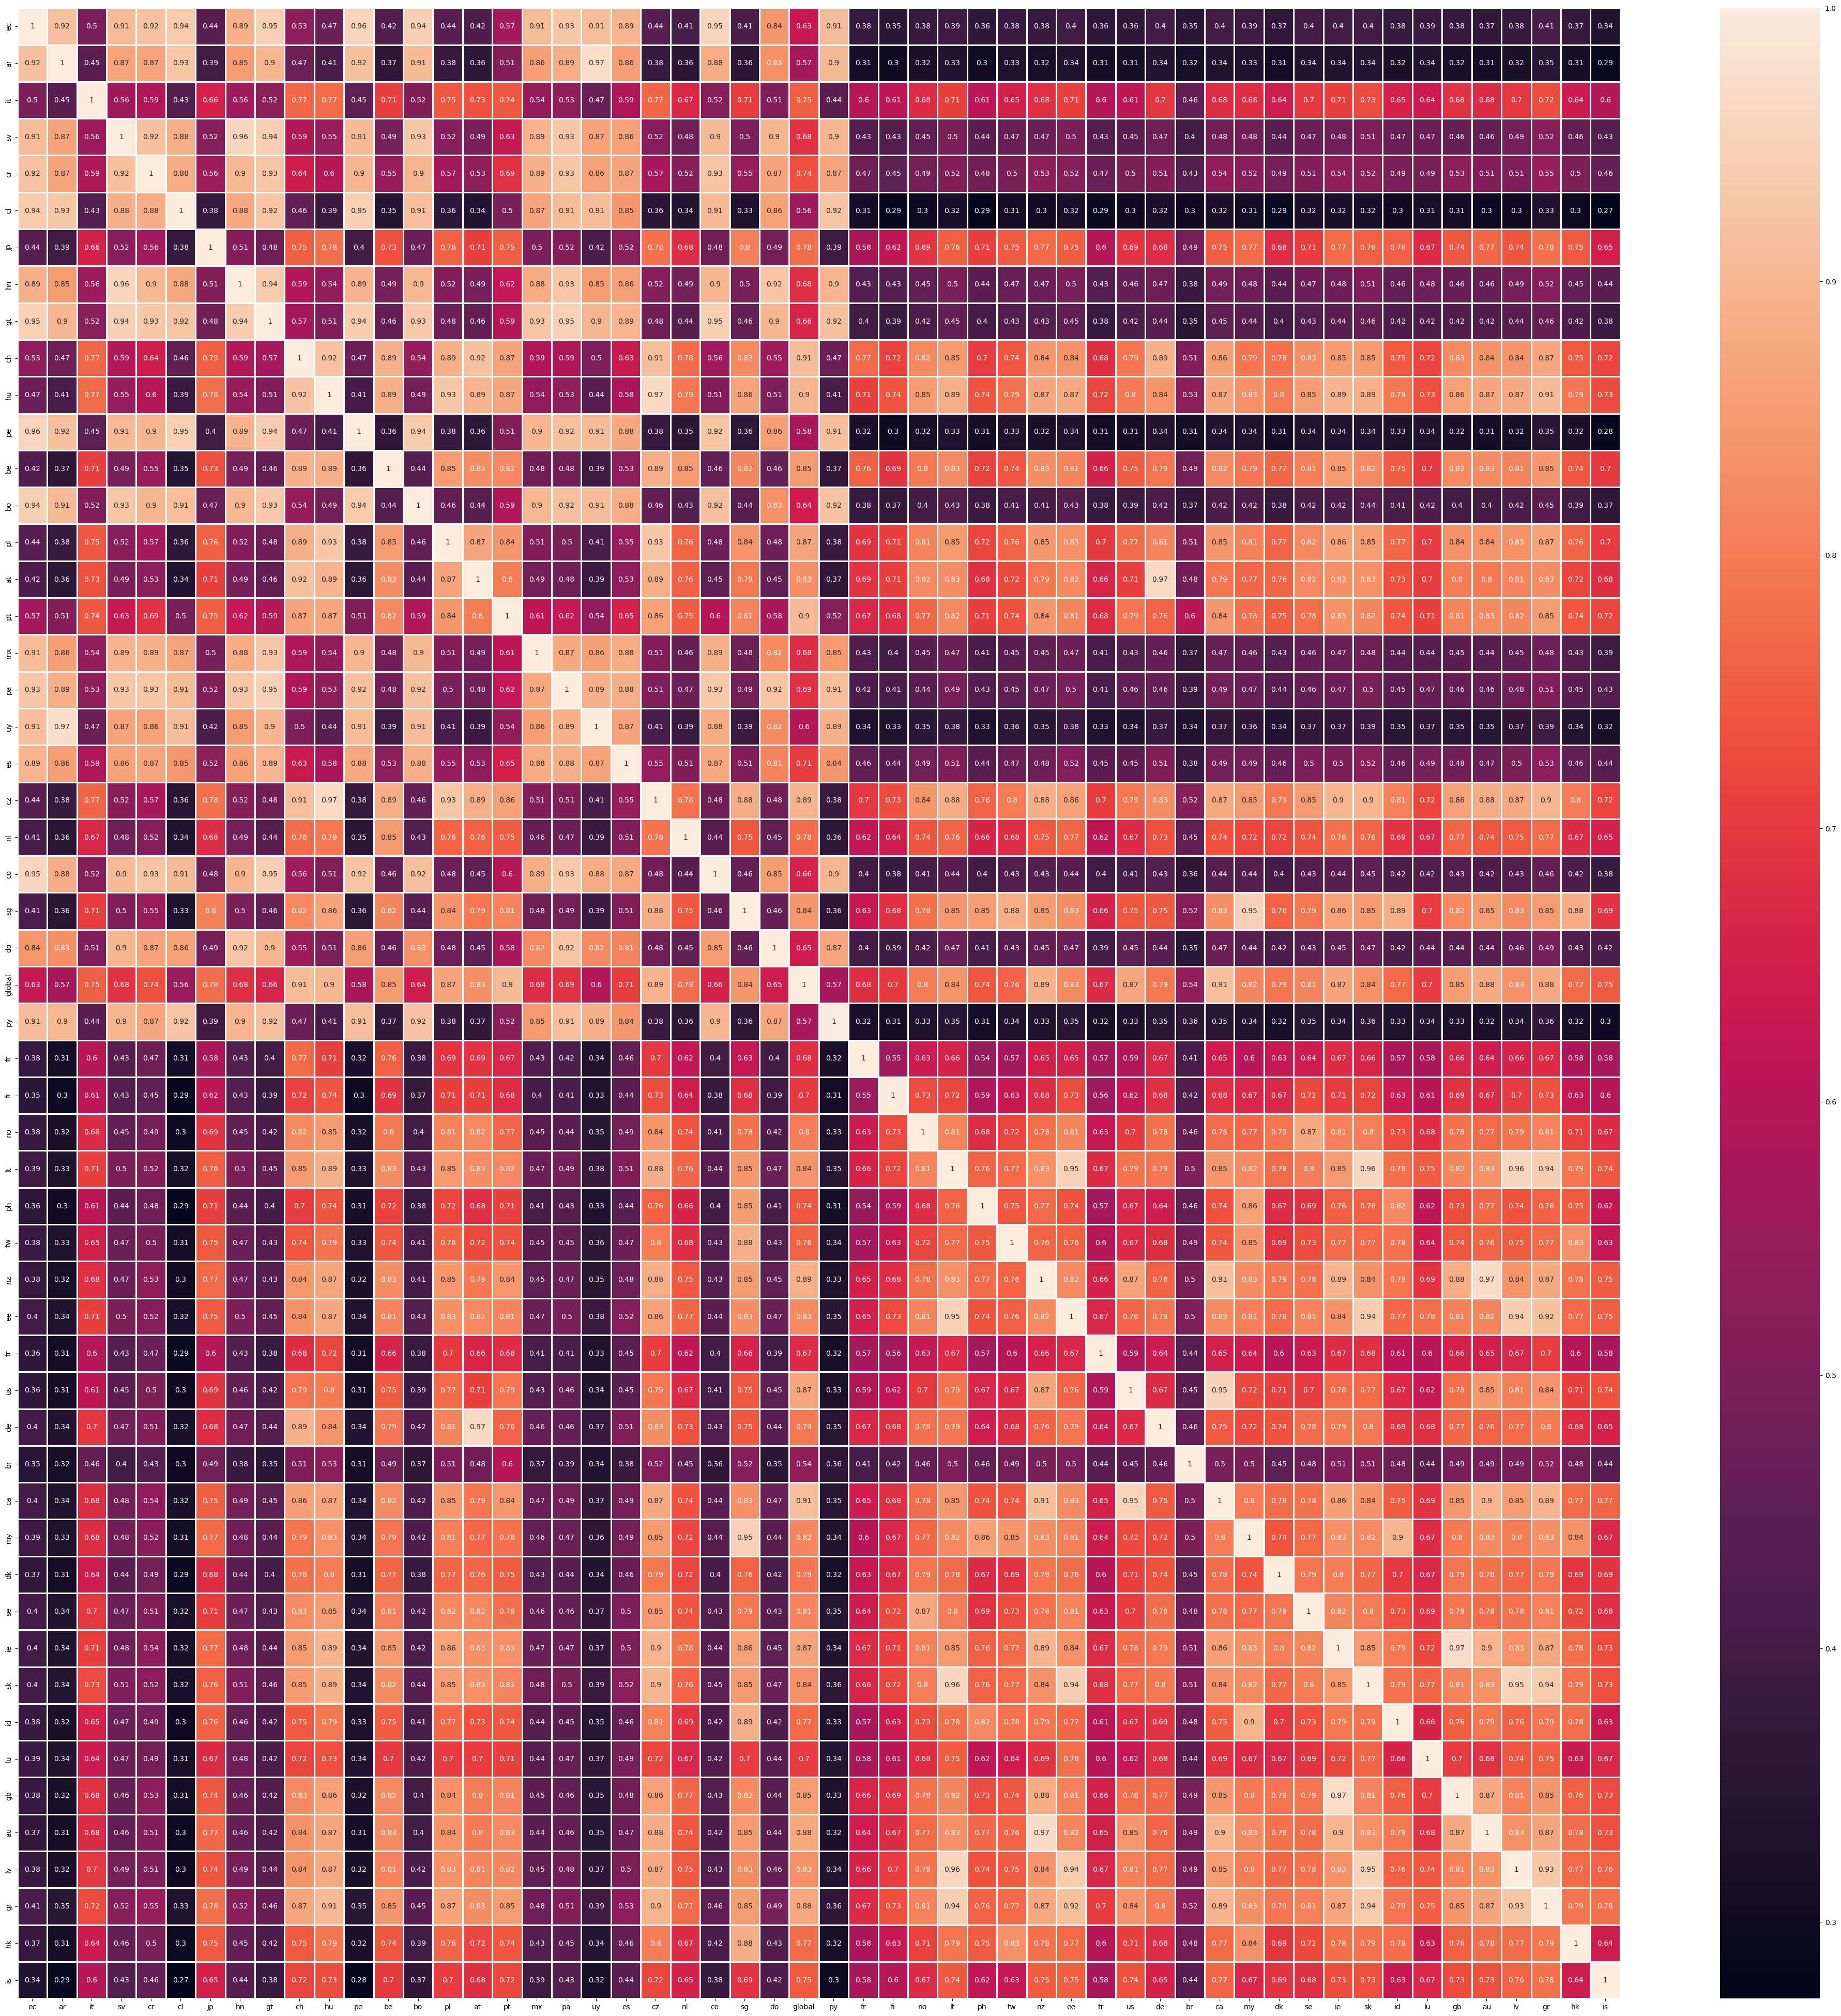

In [27]:
data_features1 = data_features.copy()
data_features1.drop(['Date','URL','Streams'],inplace = True,axis=1)
data_features1

data_features1.drop_duplicates(inplace = True)
data_features1

popularity_df1 = data_features.groupby(['Track Name','Region'])[['Streams']].sum().sort_values(by=['Streams'], ascending=False)
popularity_df1 = popularity_df1.reset_index()

popularity_df1

region_corr_df = pd.merge(popularity_df1, data_features1, how='inner', on=['Track Name','Region'])
region_corr_df = region_corr_df.reset_index()

region_corr_df

regions = region_corr_df['Region'].unique()

regions

song_region = {}


for i in region_corr_df.index:
    song = region_corr_df['Track Name'][i]
    region = region_corr_df['Region'][i]
    popularity = region_corr_df['Track_Popularity'][i]
    if(song in song_region):
        if(region in song_region[song]):
            continue
        else:
            song_region[song][region] = popularity
    else:
        area = {}
        area[region] = popularity
        song_region[song] = area




r = list(region_encode.keys())

region_df = pd.DataFrame(columns = r)
for song in song_region:
    area = song_region[song]
    region_df = region_df.append(area, ignore_index=True)

region_df

region_df.fillna(0,inplace = True)

data_corr_region = region_df.copy()


corr_matrix_region = data_corr_region.corr()
corr_fig = plt.figure(figsize=(50,50))
corr_fig2 = sns.heatmap(corr_matrix_region, annot=True,linewidths=1)
# plt.show()
corr_fig.savefig('region_corr.jpeg',bbox_inches = 'tight')





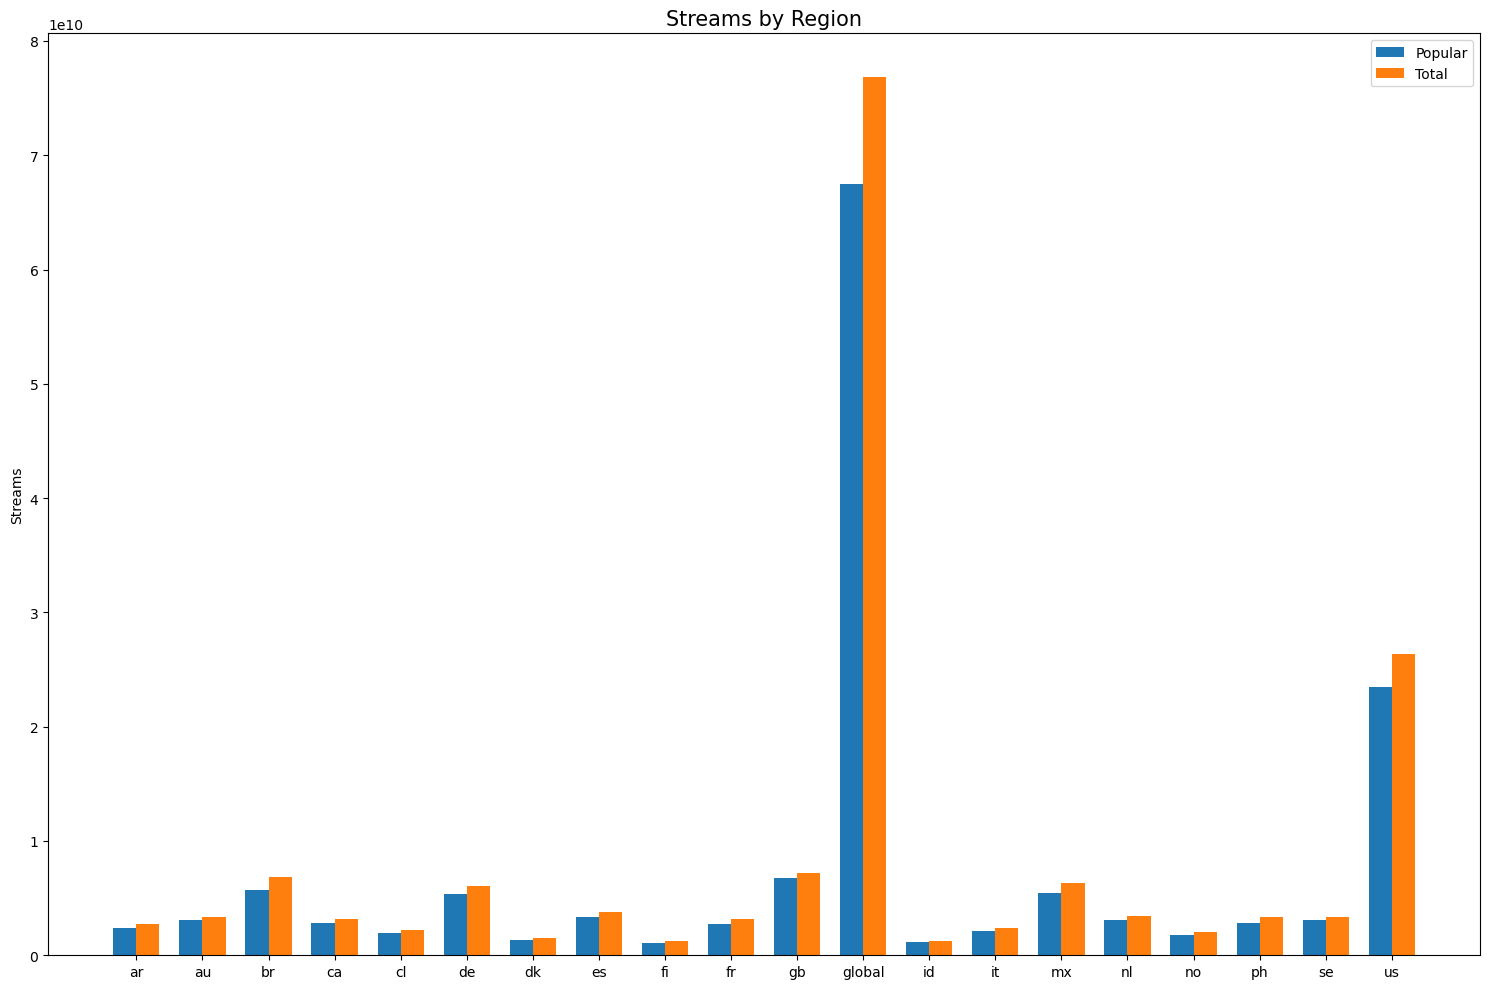

In [28]:
popularity_df = data_features.groupby(['Region','Track Name','TrackName_encoded','Region_encoded'])[['Streams']].sum().sort_values(by=['Streams'], ascending=False)
popularity_df = popularity_df.reset_index()
popularity_df 


new_df = pd.DataFrame(columns=["Region",
                         "Track Name",
                      'TrackName_encoded',
                      'Region_encoded',
                      'Streams'])
region_names = popularity_df['Region'].unique()

for region in region_names:
    top=((popularity_df[popularity_df['Region']==region]).head(int(popularity_df[popularity_df['Region']==region].count()['Region']/4)))

    new_df = pd.concat([new_df,top])




popular = new_df.groupby(['Region'])[['Streams']].sum().sort_values(by=['Streams'], ascending=False)
popular = popular.reset_index()
popular = popular[:20]
popular = popular.sort_values(by=['Region'], ascending=True)
popular

labels = popular['Region'].to_numpy(dtype = str)
labels

y = popular['Streams'].to_numpy(dtype = int)

total = popularity_df.groupby(['Region'])[['Streams']].sum().sort_values(by=['Streams'], ascending=False)
total = total.reset_index()
total = total[:20]
total = total.sort_values(by=['Region'], ascending=True)
total

x1 = total['Region'].to_numpy(dtype = str)
x1

y1 = total['Streams'].to_numpy(dtype = int)

# labels = x
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize = (15,10))
rects1 = ax.bar(x - width/2, y, width, label='Popular')
rects2 = ax.bar(x + width/2, y1, width, label='Total')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Streams')
ax.set_title('Streams by Region',fontsize=15)
ax.set_xticks(x, labels)

ax.legend()



fig.tight_layout()
fig.tight_layout()
fig.savefig('Region_streams.jpeg',bbox_inches = 'tight')
plt.show()

# Methodology and Results

Naive bayes

In [29]:
data_features.head()
data_features.columns

Index(['Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region', 'TrackID',
       'danceability', 'key', 'loudness', 'valence', 'tempo', 'duration_ms',
       'Track_Popularity', 'Artist_encoded', 'TrackName_encoded',
       'Region_encoded'],
      dtype='object')

In [30]:
naive_bayes_df = data_features.drop(['URL','Streams','Date','Region','TrackID', 'Track_Popularity', 'Artist_encoded','TrackName_encoded', 'Region_encoded'],axis=1)

In [31]:
naive_bayes_df.drop_duplicates(inplace =True)
naive_bayes_df

Track Name         Artist  danceability  key  \
0        Reggaetón Lento (Bailemos)           CNCO         0.761    4   
7277                       Chantaje        Shakira         0.852    8   
16970     Otra Vez (feat. J Balvin)  Zion & Lennox         0.832   10   
23761                  Vente Pa' Ca   Ricky Martin         0.663   11   
30143                        Safari       J Balvin         0.508    0   
...                             ...            ...           ...  ...   
3440510                         大丈夫  Supper Moment         0.502    6   
3440511                           缺    Hins Cheung         0.566   10   
3440517                          有火   Nicholas Tse         0.382    7   
3440519                         繼續追            帶菌者         0.515    0   
3440520                          無期            AGA         0.401    8   

         loudness  valence    tempo  duration_ms  
0          -3.073    0.710   93.974       222560  
7277       -2.921    0.907  102.034       195840  
16970      -5.429    0.704   96.016       209453  
23761      -4.070    0.533   99.935       259196  
30143      -4.361    0.555  180.044       205600  
...           ...      ...      ...          ...  
3440510    -8.690    0.172  143.834       207407  
3440511   -10.010    0.253  120.015       280714  
3440517    -5.470    0.377  172.166       237036  
3440519    -6.908    0.285  171.860       235116  
3440520    -8.468    0.254  130.409       301418  

[21145 rows x 8 columns]

In [32]:
popularity_df = data_features.groupby(['Region','Track Name','TrackName_encoded','Region_encoded'])[['Streams']].sum().sort_values(by=['Streams'], ascending=False)
popularity_df = popularity_df.reset_index()
popularity_df 
# global_df = popularity_df[popularity_df['Region'] == 'global']
# global_df
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# popularity_df['Streams'] = scaler.fit_transform(popularity_df['Streams'].values[:, None])


Region                             Track Name  TrackName_encoded  \
0      global                           Shape of You                255   
1      global                      Despacito - Remix                427   
2      global     Despacito (Featuring Daddy Yankee)                268   
3      global               Something Just Like This                341   
4      global                          Unforgettable                465   
...       ...                                    ...                ...   
64477      pa                           Muy Personal                613   
64478      sv  Pa Que Me Invitan - Spanglish Version                106   
64479      hu                Baby, You Make Me Crazy               1830   
64480      lu                               Chantaje                  1   
64481      hu                        Mit Mondjak Még              11782   

       Region_encoded     Streams  
0                  26  1490812208  
1                  26   919199404  
2                  26   742841612  
3                  26   692404365  
4                  26   678399824  
...               ...         ...  
64477              18        1001  
64478               3        1001  
64479              10        1001  
64480              47        1001  
64481              10        1001  

[64482 rows x 5 columns]

In [33]:
new_df = pd.DataFrame(columns=["Region",
                         "Track Name",
                      'TrackName_encoded',
                      'Region_encoded',
                      'Streams'])
region_names = popularity_df['Region'].unique()

for region in region_names:
    top=((popularity_df[popularity_df['Region']==region]).head(int(popularity_df[popularity_df['Region']==region].count()['Region']/4)))
#     print(type(top))
#     top = top.reset_index()
#     print(top)
    new_df = pd.concat([new_df,top])
#     print(new_df)
    
new_df

Region                                         Track Name  \
0      global                                       Shape of You   
1      global                                  Despacito - Remix   
2      global                 Despacito (Featuring Daddy Yankee)   
3      global                           Something Just Like This   
4      global                                      Unforgettable   
...       ...                                                ...   
35854      lu                                      XO TOUR Llif3   
36470      lu  Know No Better (feat. Travis Scott, Camila Cab...   
36551      lu                                 That's What I Like   
36903      lu                                               Cold   
36984      lu                              Chained To The Rhythm   

      TrackName_encoded Region_encoded     Streams  
0                   255             26  1490812208  
1                   427             26   919199404  
2                   268             26   742841612  
3                   341             26   692404365  
4                   465             26   678399824  
...                 ...            ...         ...  
35854               511             47       57936  
36470               501             47       54075  
36551               323             47       53472  
36903               329             47       51377  
36984               317             47       50838  

[16101 rows x 5 columns]

In [34]:
new_df = new_df.drop(['Region','Track Name'], axis=1)

In [35]:

popularity_df = pd.merge(popularity_df, new_df, how='left', on=['TrackName_encoded', 'Region_encoded'])
popularity_df

Region                             Track Name TrackName_encoded  \
0      global                           Shape of You               255   
1      global                      Despacito - Remix               427   
2      global     Despacito (Featuring Daddy Yankee)               268   
3      global               Something Just Like This               341   
4      global                          Unforgettable               465   
...       ...                                    ...               ...   
64477      pa                           Muy Personal               613   
64478      sv  Pa Que Me Invitan - Spanglish Version               106   
64479      hu                Baby, You Make Me Crazy              1830   
64480      lu                               Chantaje                 1   
64481      hu                        Mit Mondjak Még             11782   

      Region_encoded   Streams_x   Streams_y  
0                 26  1490812208  1490812208  
1                 26   919199404   919199404  
2                 26   742841612   742841612  
3                 26   692404365   692404365  
4                 26   678399824   678399824  
...              ...         ...         ...  
64477             18        1001         NaN  
64478              3        1001         NaN  
64479             10        1001         NaN  
64480             47        1001         NaN  
64481             10        1001         NaN  

[64482 rows x 6 columns]

In [36]:
popularity_df['Streams_binary_encode'] = popularity_df[popularity_df['Streams_y'].notnull()]['Streams_x'].apply(lambda x: 1)
# # popularity_df['Streams_binary_encode'] = popularity_df[val:]['Streams'].apply(lambda x: 0)
# data['Track_Name_encode'] = data['Track Name'].apply(lambda x: track_encoded[x])
popularity_df['Streams_binary_encode'] = popularity_df['Streams_binary_encode'].fillna(0)
popularity_df = popularity_df.drop(['Streams_x','Streams_y'], axis=1)
popularity_df

Region                             Track Name TrackName_encoded  \
0      global                           Shape of You               255   
1      global                      Despacito - Remix               427   
2      global     Despacito (Featuring Daddy Yankee)               268   
3      global               Something Just Like This               341   
4      global                          Unforgettable               465   
...       ...                                    ...               ...   
64477      pa                           Muy Personal               613   
64478      sv  Pa Que Me Invitan - Spanglish Version               106   
64479      hu                Baby, You Make Me Crazy              1830   
64480      lu                               Chantaje                 1   
64481      hu                        Mit Mondjak Még             11782   

      Region_encoded  Streams_binary_encode  
0                 26                    1.0  
1                 26                    1.0  
2                 26                    1.0  
3                 26                    1.0  
4                 26                    1.0  
...              ...                    ...  
64477             18                    0.0  
64478              3                    0.0  
64479             10                    0.0  
64480             47                    0.0  
64481             10                    0.0  

[64482 rows x 5 columns]

In [37]:
naive_bayes_df = pd.merge(popularity_df, naive_bayes_df, how='inner', on = 'Track Name')
# naive_bayes_df.drop_duplicates(inplace=True)
# naive_bayes_df.dropna(inplace=True)
naive_bayes_df

Region                            Track Name TrackName_encoded  \
0      global                          Shape of You               255   
1          us                          Shape of You               255   
2          gb                          Shape of You               255   
3          de                          Shape of You               255   
4          br                          Shape of You               255   
...       ...                                   ...               ...   
95351      is  Hvað Finnst Þér Um Það? (feat. Kilo)             15075   
95352      sk              Hlavarozbitajakslovensko             17106   
95353      lv                              Ir Vērts             18226   
95354      lv                                 Улети             18257   
95355      hu                       Mit Mondjak Még             11782   

      Region_encoded  Streams_binary_encode               Artist  \
0                 26                    1.0           Ed Sheeran   
1                 37                    1.0           Ed Sheeran   
2                 48                    1.0           Ed Sheeran   
3                 38                    1.0           Ed Sheeran   
4                 39                    1.0           Ed Sheeran   
...              ...                    ...                  ...   
95351             53                    0.0           Ragga Holm   
95352             45                    0.0         Radikal Chef   
95353             50                    0.0    Singapūras Satīns   
95354             50                    0.0               T-Fest   
95355             10                    0.0  Kowalsky Meg A Vega   

       danceability  key  loudness  valence    tempo  duration_ms  
0             0.825    1    -3.183    0.931   95.977       233713  
1             0.825    1    -3.183    0.931   95.977       233713  
2             0.825    1    -3.183    0.931   95.977       233713  
3             0.825    1    -3.183    0.931   95.977       233713  
4             0.825    1    -3.183    0.931   95.977       233713  
...             ...  ...       ...      ...      ...          ...  
95351         0.762   11    -8.761    0.433  132.035       162744  
95352         0.638    1    -5.530    0.146  137.910       235000  
95353         0.607    3    -7.705    0.384  175.905       341563  
95354         0.710    9   -10.024    0.208  109.959       209477  
95355         0.750    9    -7.069    0.879  113.003       261387  

[95356 rows x 12 columns]

In [38]:
naive_bayes_df.columns

Index(['Region', 'Track Name', 'TrackName_encoded', 'Region_encoded',
       'Streams_binary_encode', 'Artist', 'danceability', 'key', 'loudness',
       'valence', 'tempo', 'duration_ms'],
      dtype='object')

In [39]:


naive_bayes_df['Artist'] = naive_bayes_df['Artist'].apply(lambda x: artists_encoded[x])

In [40]:
naive_bayes_df.drop(['Region', 'Track Name','TrackName_encoded', 'Region_encoded'],inplace=True,axis=1)
naive_bayes_df

Streams_binary_encode  Artist  danceability  key  loudness  valence  \
0                        1.0      72         0.825    1    -3.183    0.931   
1                        1.0      72         0.825    1    -3.183    0.931   
2                        1.0      72         0.825    1    -3.183    0.931   
3                        1.0      72         0.825    1    -3.183    0.931   
4                        1.0      72         0.825    1    -3.183    0.931   
...                      ...     ...           ...  ...       ...      ...   
95351                    0.0    5450         0.762   11    -8.761    0.433   
95352                    0.0    6083         0.638    1    -5.530    0.146   
95353                    0.0    6512         0.607    3    -7.705    0.384   
95354                    0.0    6526         0.710    9   -10.024    0.208   
95355                    0.0    4073         0.750    9    -7.069    0.879   

         tempo  duration_ms  
0       95.977       233713  
1       95.977       233713  
2       95.977       233713  
3       95.977       233713  
4       95.977       233713  
...        ...          ...  
95351  132.035       162744  
95352  137.910       235000  
95353  175.905       341563  
95354  109.959       209477  
95355  113.003       261387  

[95356 rows x 8 columns]

In [41]:
naive_bayes_df

Streams_binary_encode  Artist  danceability  key  loudness  valence  \
0                        1.0      72         0.825    1    -3.183    0.931   
1                        1.0      72         0.825    1    -3.183    0.931   
2                        1.0      72         0.825    1    -3.183    0.931   
3                        1.0      72         0.825    1    -3.183    0.931   
4                        1.0      72         0.825    1    -3.183    0.931   
...                      ...     ...           ...  ...       ...      ...   
95351                    0.0    5450         0.762   11    -8.761    0.433   
95352                    0.0    6083         0.638    1    -5.530    0.146   
95353                    0.0    6512         0.607    3    -7.705    0.384   
95354                    0.0    6526         0.710    9   -10.024    0.208   
95355                    0.0    4073         0.750    9    -7.069    0.879   

         tempo  duration_ms  
0       95.977       233713  
1       95.977       233713  
2       95.977       233713  
3       95.977       233713  
4       95.977       233713  
...        ...          ...  
95351  132.035       162744  
95352  137.910       235000  
95353  175.905       341563  
95354  109.959       209477  
95355  113.003       261387  

[95356 rows x 8 columns]

In [42]:
X = naive_bayes_df.drop('Streams_binary_encode', axis=1).to_numpy()
y = naive_bayes_df['Streams_binary_encode'].to_numpy()

In [43]:
print('Input features shape: {}'.format(X.shape))
print('Targets shape: {}'.format(y.shape))

Input features shape: (95356, 7)
Targets shape: (95356,)


In [44]:
 # Student needs to provide code similar to below
print('Number of popular songs: {}'.format((y==1).sum()))
print('Number of not-so-popular songs: {}'.format((y==0).sum()))

Number of popular songs: 26535
Number of not-so-popular songs: 68821


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 5)

In [46]:
from sklearn.preprocessing import StandardScaler  
sc = StandardScaler()  
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test)

In [47]:
from sklearn.naive_bayes import GaussianNB  
classifier = GaussianNB()  
classifier.fit(X_train, y_train) 

GaussianNB()

In [48]:
# Predicting the Test set results  

y_pred = classifier.predict(X_test)  

In [49]:

from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred) 

0.6650027266244389

In [50]:
dt = tree.DecisionTreeClassifier(random_state=0, max_depth=9)
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
dt_Accuracy = accuracy_score(y_test, dt_predict)
dt_Accuracy_test = dt.score(X_test,y_test)
dt_Accuracy_train = dt.score(X_train,y_train)
print("Accuracy test: " + str(dt_Accuracy_test))
print("Accuracy train: " + str(dt_Accuracy_train))
# print("Accuracy: " + str(dt_Accuracy))

Accuracy test: 0.7513737992365451
Accuracy train: 0.7593579149013521


In [51]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
depth = np.arange(1,30)
# depth = [20]
acc_test_dt = []
acc_train_dt = []

loss_test_dt = []
loss_train_dt = []

for i in depth:
    dt = DecisionTreeClassifier(random_state=42, max_depth=i)
    dt.fit(X_train, y_train)
    dt_predict_train = dt.predict(X_train)
    dt_predict_test = dt.predict(X_test)
    # dt_Accuracy = score(y_test, dt_predict)
    dt_Accuracy_train = dt.score(X_train,y_train)
    dt_Accuracy_test = dt.score(X_test,y_test)

    #     print("Accuracy: " + str(dt_Accuracy))

    # print(dt.predict_log_proba(X_test))

    acc_train_dt.append(dt_Accuracy_train)
    acc_test_dt.append(dt_Accuracy_test)
    
#     print(dt.predict_proba(X_train))
#     print(classification_report(y_true=y_test,y_pred=dt_predict_test))
    loss_train_dt.append(log_loss(y_train,dt.predict_proba(X_train)))
    loss_test_dt.append(log_loss(y_test,dt.predict_proba(X_test)))

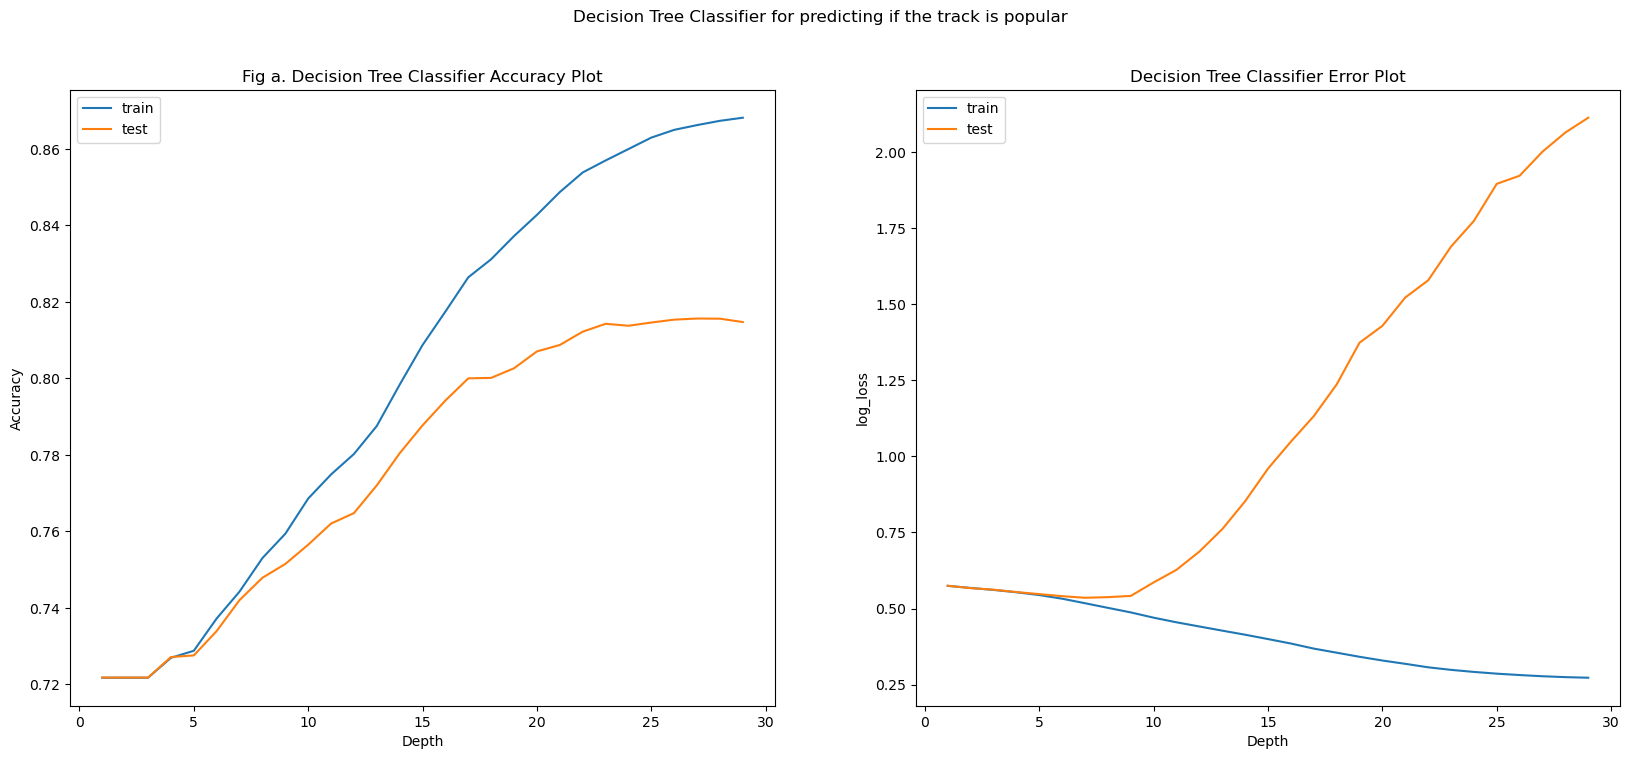

In [52]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(depth,acc_train_dt,label = 'train')
ax[0].plot(depth,acc_test_dt,label = 'test')
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Fig a. Decision Tree Classifier Accuracy Plot')
ax[0].legend()


ax[1].plot(depth,loss_train_dt,label = 'train')
ax[1].plot(depth,loss_test_dt,label = 'test')
ax[1].set_xlabel('Depth')
ax[1].set_ylabel('log_loss')
ax[1].set_title('Decision Tree Classifier Error Plot')
ax[1].legend()
fig.suptitle('Decision Tree Classifier for predicting if the track is popular')
plt.show()





# plt.show()
fig.savefig('DecisionTreeClassifierpopularitybinary.jpeg',bbox_inches = 'tight')



In [54]:
#cross validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kf = KFold(n_splits=10,shuffle = True,random_state = 42)
kf.get_n_splits(X)
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    nb = GaussianNB()  
    nb.fit(X_train, y_train)
    nb_predict = nb.predict(X_test)
    nb_Accuracy = accuracy_score(y_test, nb_predict)
    precision, recall, f1, n = precision_recall_fscore_support(y_test, nb_predict, average='weighted')
    y_pred_proba = nb.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba[:,1])
    accuracies.append(nb_Accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)
#     print(precision,recall,f1)
#     print("Accuracy: " + str(dt_Accuracy))
def average_results():
    nb_accuracy = np.array(accuracies).mean()
    nb_precision = np.array(precisions).mean()
    nb_recall = np.array(recalls).mean()
    nb_f1 = np.array(f1s).mean()
    nb_auc = np.array(aucs).mean()
    return nb_accuracy,nb_precision,nb_recall,nb_f1,nb_auc
#Decision Tree Model
nb_accuracy,nb_precision,nb_recall,nb_f1,nb_auc = average_results()
print(nb_accuracy,nb_precision,nb_recall,nb_f1,nb_auc)

TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   39    53    70 ... 95327 95334 95350]
TRAIN: [    0     1     2 ... 95352 95353 95354] TEST: [    8    54    75 ... 95328 95330 95355]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   12    24    34 ... 95340 95347 95352]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [    4     6     7 ... 95324 95331 95349]
TRAIN: [    1     2     3 ... 95353 95354 95355] TEST: [    0    33    40 ... 95326 95336 95343]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [    3     9    11 ... 95316 95339 95344]
TRAIN: [    0     2     3 ... 95353 95354 95355] TEST: [    1    10    13 ... 95342 95345 95348]
TRAIN: [    0     1     2 ... 95352 95353 95355] TEST: [   14    16    29 ... 95332 95333 95354]
TRAIN: [    0     1     3 ... 95352 95354 95355] TEST: [    2     5    15 ... 95346 95351 95353]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   28    55    60 ... 95335 95338 95341]
0.7217268725606473 0.520916980

In [55]:
#cross validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kf = KFold(n_splits=10,shuffle = True,random_state = 42)
kf.get_n_splits(X)
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    dt = tree.DecisionTreeClassifier(random_state=0, max_depth=20)
    dt.fit(X_train, y_train)
    dt_predict = dt.predict(X_test)
    dt_Accuracy = accuracy_score(y_test, dt_predict)
    precision, recall, f1, n = precision_recall_fscore_support(y_test, dt_predict, average='weighted')
    y_pred_proba = dt.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba[:,1])
    accuracies.append(dt_Accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)
#     print(precision,recall,f1)
#     print("Accuracy: " + str(dt_Accuracy))
def average_results():
    dt_accuracy = np.array(accuracies).mean()
    dt_precision = np.array(precisions).mean()
    dt_recall = np.array(recalls).mean()
    dt_f1 = np.array(f1s).mean()
    dt_auc = np.array(aucs).mean()
    return dt_accuracy,dt_precision,dt_recall,dt_f1,dt_auc
#Decision Tree Model
dt_accuracy,dt_precision,dt_recall,dt_f1,dt_auc = average_results()
print(dt_accuracy,dt_precision,dt_recall,dt_f1,dt_auc)

TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   39    53    70 ... 95327 95334 95350]
TRAIN: [    0     1     2 ... 95352 95353 95354] TEST: [    8    54    75 ... 95328 95330 95355]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   12    24    34 ... 95340 95347 95352]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [    4     6     7 ... 95324 95331 95349]
TRAIN: [    1     2     3 ... 95353 95354 95355] TEST: [    0    33    40 ... 95326 95336 95343]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [    3     9    11 ... 95316 95339 95344]
TRAIN: [    0     2     3 ... 95353 95354 95355] TEST: [    1    10    13 ... 95342 95345 95348]
TRAIN: [    0     1     2 ... 95352 95353 95355] TEST: [   14    16    29 ... 95332 95333 95354]
TRAIN: [    0     1     3 ... 95352 95354 95355] TEST: [    2     5    15 ... 95346 95351 95353]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   28    55    60 ... 95335 95338 95341]
0.8132681167581113 0.807365658

In [56]:
#cross validate
from sklearn.metrics import precision_recall_fscore_support
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score

kf = KFold(n_splits=10,shuffle = True,random_state = 42)
kf.get_n_splits(X)
accuracies = []
precisions = []
recalls = []
f1s = []
aucs = []

for train_index, test_index in kf.split(X):
    print("TRAIN:", train_index, "TEST:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    rf = RandomForestClassifier(random_state=0, max_depth=20)
    rf.fit(X_train, y_train)
    rf_predict = rf.predict(X_test)
    rf_Accuracy = accuracy_score(y_test, rf_predict)
    precision, recall, f1, n = precision_recall_fscore_support(y_test, rf_predict, average='weighted')
    y_pred_proba = rf.predict_proba(X_test)
    auc = roc_auc_score(y_test, y_pred_proba[:,1])
    accuracies.append(rf_Accuracy)
    precisions.append(precision)
    recalls.append(recall)
    f1s.append(f1)
    aucs.append(auc)
#     print(precision,recall,f1)
#     print("Accuracy: " + str(dt_Accuracy))
def average_results():
    rf_accuracy = np.array(accuracies).mean()
    rf_precision = np.array(precisions).mean()
    rf_recall = np.array(recalls).mean()
    rf_f1 = np.array(f1s).mean()
    rf_auc = np.array(aucs).mean()
    return rf_accuracy,rf_precision,rf_recall,rf_f1,rf_auc
#Decision Tree Model
rf_accuracy,rf_precision,rf_recall,rf_f1,rf_auc = average_results()
print(rf_accuracy,rf_precision,rf_recall,rf_f1,rf_auc)

TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   39    53    70 ... 95327 95334 95350]
TRAIN: [    0     1     2 ... 95352 95353 95354] TEST: [    8    54    75 ... 95328 95330 95355]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   12    24    34 ... 95340 95347 95352]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [    4     6     7 ... 95324 95331 95349]
TRAIN: [    1     2     3 ... 95353 95354 95355] TEST: [    0    33    40 ... 95326 95336 95343]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [    3     9    11 ... 95316 95339 95344]
TRAIN: [    0     2     3 ... 95353 95354 95355] TEST: [    1    10    13 ... 95342 95345 95348]
TRAIN: [    0     1     2 ... 95352 95353 95355] TEST: [   14    16    29 ... 95332 95333 95354]
TRAIN: [    0     1     3 ... 95352 95354 95355] TEST: [    2     5    15 ... 95346 95351 95353]
TRAIN: [    0     1     2 ... 95353 95354 95355] TEST: [   28    55    60 ... 95335 95338 95341]
0.8296069716656753 0.823530680

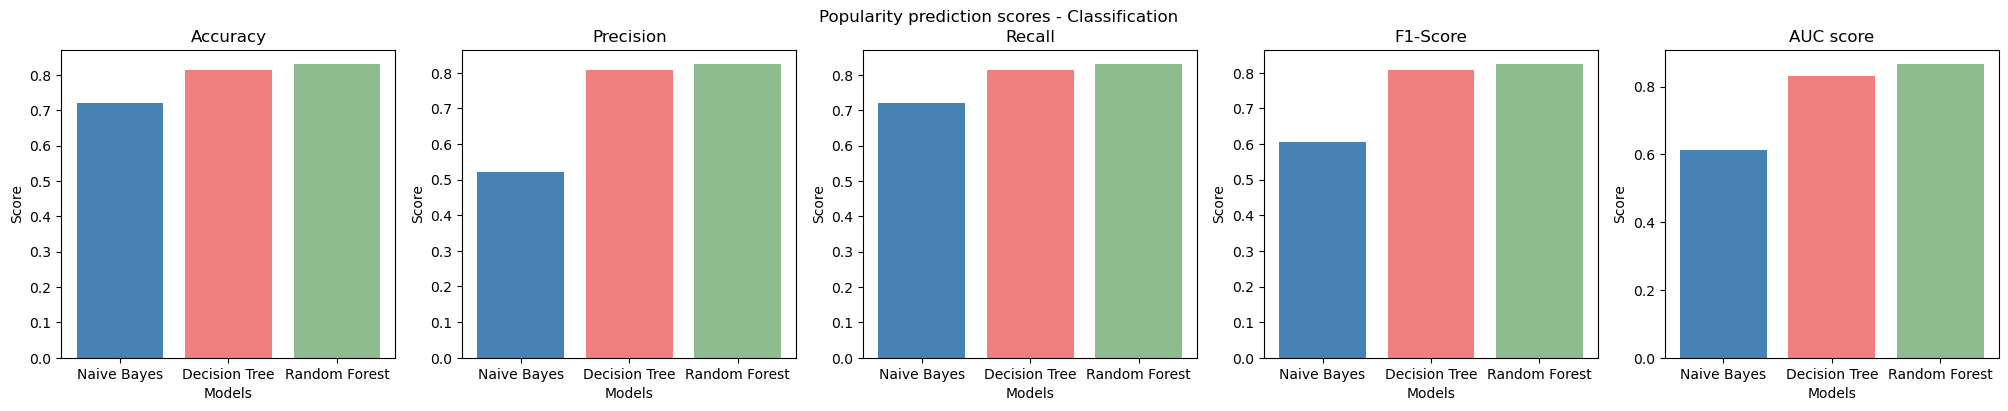

In [57]:
fig,ax = plt.subplots(1,5,figsize = (25,4))
labels = ['Naive Bayes','Decision Tree','Random Forest']
params = ['Accuracy','Precision','Recall','F1-Score','AUC score']
precision = [nb_precision,dt_precision,rf_precision]
values = [[nb_accuracy,dt_accuracy,rf_accuracy],[nb_precision,dt_precision,rf_precision],[nb_recall,dt_recall,rf_recall],[nb_f1,dt_f1,rf_f1],[nb_auc,dt_auc,rf_auc]]
for i in range(5):
    ax[i].bar(labels,values[i], color = ['steelblue', 'lightcoral','darkseagreen'])
    ax[i].set_title(params[i])
    ax[i].set_xlabel('Models')
    ax[i].set_ylabel('Score')
fig.suptitle('Popularity prediction scores - Classification')
fig.savefig('Popularity_prediction_scores_Classification.pdf',bbox_inches = 'tight')


In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error,log_loss
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
depth = np.arange(1,30)
# depth = [20]
acc_test_rf = []
acc_train_rf = []

loss_test_rf = []
loss_train_rf = []

for i in depth:
    rf = RandomForestClassifier(random_state=42, max_depth=i)
    rf.fit(X_train, y_train)
    rf_predict_train = rf.predict(X_train)
    rf_predict_test = rf.predict(X_test)
    # dt_Accuracy = score(y_test, dt_predict)
    rf_Accuracy_train = rf.score(X_train,y_train)
    rf_Accuracy_test = rf.score(X_test,y_test)

    #     print("Accuracy: " + str(dt_Accuracy))

    # print(dt.predict_log_proba(X_test))

    acc_train_rf.append(rf_Accuracy_train)
    acc_test_rf.append(rf_Accuracy_test)
    
#     print(dt.predict_proba(X_train))
#     print(classification_report(y_true=y_test,y_pred=dt_predict_test))
    loss_train_rf.append(log_loss(y_train,rf.predict_proba(X_train)))
    loss_test_rf.append(log_loss(y_test,rf.predict_proba(X_test)))


In [59]:
rf = RandomForestClassifier(random_state=42, max_depth=12)
rf.fit(X_train, y_train)
rf_predict_train = rf.predict(X_train)
rf_predict_test = rf.predict(X_test)
# dt_Accuracy = score(y_test, dt_predict)
rf_Accuracy_train = rf.score(X_train,y_train)
rf_Accuracy_test = rf.score(X_test,y_test)
rf_Accuracy_test

0.8083901415836392

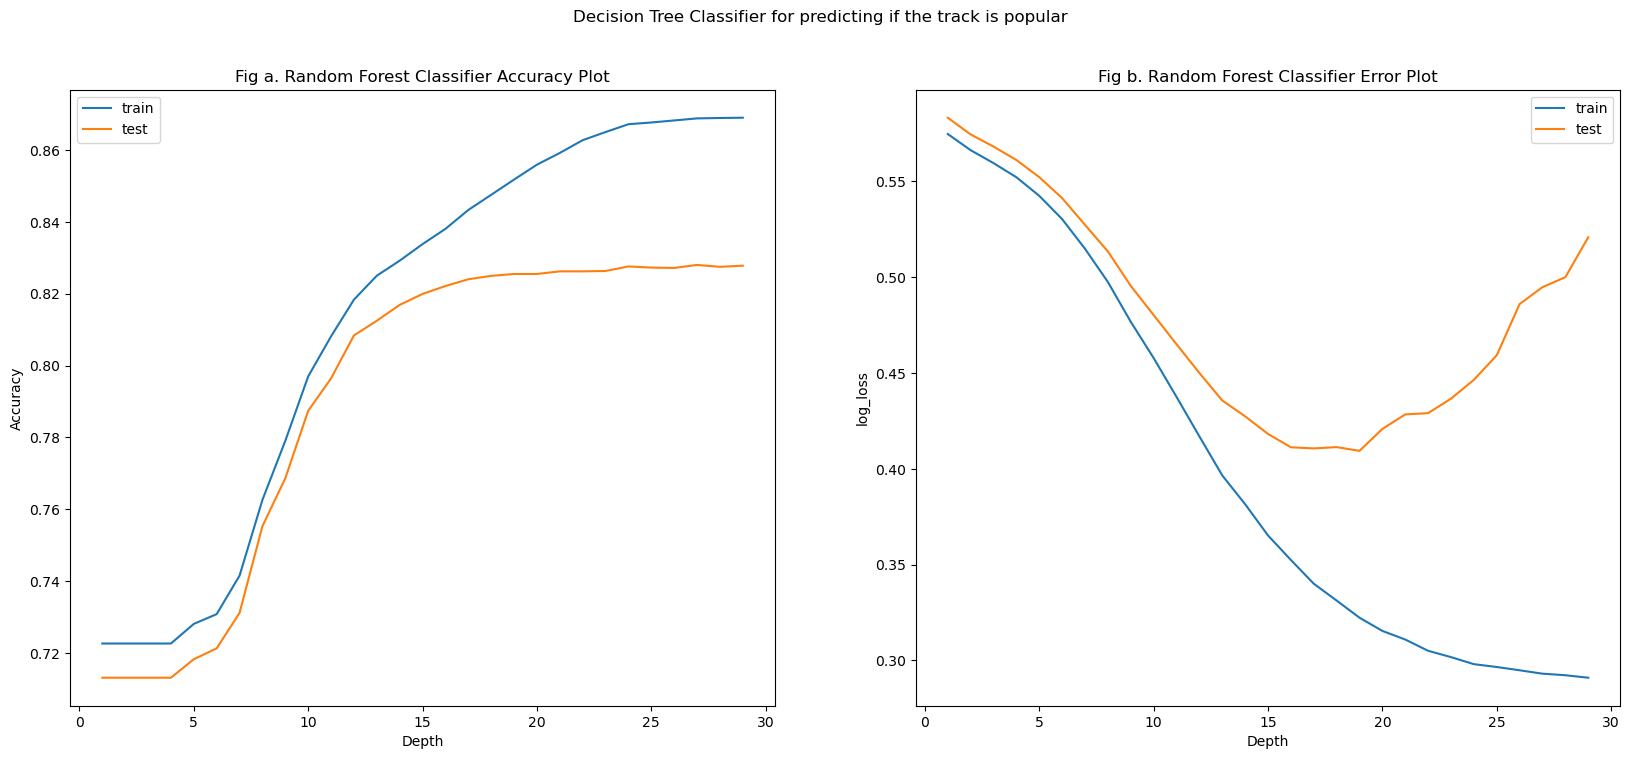

In [60]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(depth,acc_train_rf,label = 'train')
ax[0].plot(depth,acc_test_rf,label = 'test')
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Fig a. Random Forest Classifier Accuracy Plot')
ax[0].legend()


ax[1].plot(depth,loss_train_rf,label = 'train')
ax[1].plot(depth,loss_test_rf,label = 'test')
ax[1].set_xlabel('Depth')
ax[1].set_ylabel('log_loss')
ax[1].set_title('Fig b. Random Forest Classifier Error Plot')
ax[1].legend()
fig.suptitle('Decision Tree Classifier for predicting if the track is popular')

plt.show()
fig.savefig('RandomForestClassifierpopularitybinary.jpeg',bbox_inches = 'tight')

Popularity score prediction using Regression models

In [61]:
data_features.head()

Track Name Artist  Streams  \
0  Reggaetón Lento (Bailemos)   CNCO    19272   
1  Reggaetón Lento (Bailemos)   CNCO    16672   
2  Reggaetón Lento (Bailemos)   CNCO    17258   
3  Reggaetón Lento (Bailemos)   CNCO    18146   
4  Reggaetón Lento (Bailemos)   CNCO    17788   

                                                 URL        Date Region  \
0  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-01     ec   
1  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-02     ec   
2  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-03     ec   
3  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-04     ec   
4  https://open.spotify.com/track/3AEZUABDXNtecAO...  2017-01-05     ec   

                  TrackID  danceability  key  loudness  valence   tempo  \
0  3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073     0.71  93.974   
1  3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073     0.71  93.974   
2  3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073     0.71  93.974   
3  3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073     0.71  93.974   
4  3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073     0.71  93.974   

   duration_ms  Track_Popularity  Artist_encoded  TrackName_encoded  \
0       222560         3173419.0               0                  0   
1       222560         3173419.0               0                  0   
2       222560         3173419.0               0                  0   
3       222560         3173419.0               0                  0   
4       222560         3173419.0               0                  0   

   Region_encoded  
0               0  
1               0  
2               0  
3               0  
4               0

In [62]:
data_features.columns

Index(['Track Name', 'Artist', 'Streams', 'URL', 'Date', 'Region', 'TrackID',
       'danceability', 'key', 'loudness', 'valence', 'tempo', 'duration_ms',
       'Track_Popularity', 'Artist_encoded', 'TrackName_encoded',
       'Region_encoded'],
      dtype='object')

In [63]:

data_features2 = data_features.copy()
data_features2.drop(['Date','URL','Streams'],inplace = True,axis=1)
data_features2

Track Name        Artist Region  \
0        Reggaetón Lento (Bailemos)          CNCO     ec   
1        Reggaetón Lento (Bailemos)          CNCO     ec   
2        Reggaetón Lento (Bailemos)          CNCO     ec   
3        Reggaetón Lento (Bailemos)          CNCO     ec   
4        Reggaetón Lento (Bailemos)          CNCO     ec   
...                             ...           ...    ...   
3440516                           缺   Hins Cheung     hk   
3440517                          有火  Nicholas Tse     hk   
3440518                          有火  Nicholas Tse     hk   
3440519                         繼續追           帶菌者     hk   
3440520                          無期           AGA     hk   

                        TrackID  danceability  key  loudness  valence  \
0        3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
1        3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
2        3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
3        3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
4        3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
...                         ...           ...  ...       ...      ...   
3440516  27RQbXMyZMqOjFvSg5slg4         0.566   10   -10.010    0.253   
3440517  484RuK3NdSwb8y6Z2cFpq4         0.382    7    -5.470    0.377   
3440518  484RuK3NdSwb8y6Z2cFpq4         0.382    7    -5.470    0.377   
3440519  2yJXJzjCUHdGmWmlMNq0lt         0.515    0    -6.908    0.285   
3440520  724MwpBKglgmnf2PIcvyAK         0.401    8    -8.468    0.254   

           tempo  duration_ms  Track_Popularity  Artist_encoded  \
0         93.974       222560         3173419.0               0   
1         93.974       222560         3173419.0               0   
2         93.974       222560         3173419.0               0   
3         93.974       222560         3173419.0               0   
4         93.974       222560         3173419.0               0   
...          ...          ...               ...             ...   
3440516  120.015       280714           20465.0            2082   
3440517  172.166       237036            5776.0            2303   
3440518  172.166       237036            5776.0            2303   
3440519  171.860       235116            2178.0            6627   
3440520  130.409       301418            2441.0            6554   

         TrackName_encoded  Region_encoded  
0                        0               0  
1                        0               0  
2                        0               0  
3                        0               0  
4                        0               0  
...                    ...             ...  
3440516              18590              52  
3440517              18591              52  
3440518              18591              52  
3440519              18592              52  
3440520              18593              52  

[3440521 rows x 14 columns]

In [64]:
data_features2.drop_duplicates(inplace = True)
data_features2

Track Name         Artist Region  \
0        Reggaetón Lento (Bailemos)           CNCO     ec   
371      Reggaetón Lento (Bailemos)           CNCO     ar   
742      Reggaetón Lento (Bailemos)           CNCO     it   
1053     Reggaetón Lento (Bailemos)           CNCO     sv   
1417     Reggaetón Lento (Bailemos)           CNCO     cr   
...                             ...            ...    ...   
3440510                         大丈夫  Supper Moment     hk   
3440511                           缺    Hins Cheung     hk   
3440517                          有火   Nicholas Tse     hk   
3440519                         繼續追            帶菌者     hk   
3440520                          無期            AGA     hk   

                        TrackID  danceability  key  loudness  valence  \
0        3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
371      3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
742      3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
1053     3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
1417     3AEZUABDXNtecAOSC1qTfo         0.761    4    -3.073    0.710   
...                         ...           ...  ...       ...      ...   
3440510  6GVJR2nEXF6gVNHEe6PLue         0.502    6    -8.690    0.172   
3440511  27RQbXMyZMqOjFvSg5slg4         0.566   10   -10.010    0.253   
3440517  484RuK3NdSwb8y6Z2cFpq4         0.382    7    -5.470    0.377   
3440519  2yJXJzjCUHdGmWmlMNq0lt         0.515    0    -6.908    0.285   
3440520  724MwpBKglgmnf2PIcvyAK         0.401    8    -8.468    0.254   

           tempo  duration_ms  Track_Popularity  Artist_encoded  \
0         93.974       222560      3.173419e+06               0   
371       93.974       222560      3.252083e+07               0   
742       93.974       222560      7.310247e+06               0   
1053      93.974       222560      1.012619e+06               0   
1417      93.974       222560      3.896386e+06               0   
...          ...          ...               ...             ...   
3440510  143.834       207407      2.148000e+03            6549   
3440511  120.015       280714      2.046500e+04            2082   
3440517  172.166       237036      5.776000e+03            2303   
3440519  171.860       235116      2.178000e+03            6627   
3440520  130.409       301418      2.441000e+03            6554   

         TrackName_encoded  Region_encoded  
0                        0               0  
371                      0               1  
742                      0               2  
1053                     0               3  
1417                     0               4  
...                    ...             ...  
3440510              18589              52  
3440511              18590              52  
3440517              18591              52  
3440519              18592              52  
3440520              18593              52  

[74649 rows x 14 columns]

In [65]:
popularity_df1 = data_features.groupby(['Track Name','Region'])[['Streams']].sum().sort_values(by=['Streams'], ascending=False)
popularity_df1 = popularity_df1.reset_index()

popularity_df1





Track Name  Region     Streams
0                               Shape of You  global  1490812208
1                          Despacito - Remix  global   919199404
2         Despacito (Featuring Daddy Yankee)  global   742841612
3                   Something Just Like This  global   692404365
4                              Unforgettable  global   678399824
...                                      ...     ...         ...
64477                Baby, You Make Me Crazy      hu        1001
64478                        Mit Mondjak Még      hu        1001
64479                               Chantaje      lu        1001
64480                           Muy Personal      pa        1001
64481  Pa Que Me Invitan - Spanglish Version      sv        1001

[64482 rows x 3 columns]

In [66]:
popularity_df_r = pd.merge(popularity_df1, data_features2, how='inner', on=['Track Name','Region'])
popularity_df_r = popularity_df_r.reset_index()
# popularity_df.drop('Streams_y', axis =1,inplace=True)
# popularity_df.drop(['URL','Date','Region','TrackID'],axis = 1,inplace = True)
# popularity_df.drop_duplicates(inplace = True)
# popularity_df.dropna(inplace = True)
popularity_df_r

index                             Track Name  Region     Streams  \
0          0                           Shape of You  global  1490812208   
1          1                      Despacito - Remix  global   919199404   
2          2     Despacito (Featuring Daddy Yankee)  global   742841612   
3          3               Something Just Like This  global   692404365   
4          4                          Unforgettable  global   678399824   
...      ...                                    ...     ...         ...   
74644  74644                Baby, You Make Me Crazy      hu        1001   
74645  74645                        Mit Mondjak Még      hu        1001   
74646  74646                               Chantaje      lu        1001   
74647  74647                           Muy Personal      pa        1001   
74648  74648  Pa Que Me Invitan - Spanglish Version      sv        1001   

                    Artist                 TrackID  danceability  key  \
0               Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3         0.825    1   
1               Luis Fonsi  5CtI0qwDJkDQGwXD1H1cLb         0.694    2   
2               Luis Fonsi  4aWmUDTfIPGksMNLV2rQP2         0.660    2   
3         The Chainsmokers  6RUKPb4LETWmmr3iAEQktW         0.617   11   
4           French Montana  1F2HXIJrE2Xn81OzT2zZvW         0.726    6   
...                    ...                     ...           ...  ...   
74644            Sam Smith  1p1SbqeipOd4ezKUpxqaz6         0.513    5   
74645  Kowalsky Meg A Vega  3iZbFrrECmPZ3psxM05lJI         0.750    9   
74646              Shakira  6mICuAdrwEjh6Y6lroV2Kg         0.852    8   
74647               Yandel  1oNtIPC2XBWpE7A1x9YjQi         0.565    8   
74648            Jencarlos  2VRssqds7rRNb4eaG9FaY8         0.790    6   

       loudness  valence    tempo  duration_ms  Track_Popularity  \
0        -3.183    0.931   95.977       233713      1.499003e+09   
1        -4.328    0.813   88.931       228827      9.191994e+08   
2        -4.757    0.846  177.833       228200      7.491015e+08   
3        -6.769    0.446  103.019       247160      6.989778e+08   
4        -5.043    0.733   97.985       233833      5.740306e+08   
...         ...      ...      ...          ...               ...   
74644    -7.714    0.497  169.743       207966      2.002000e+04   
74645    -7.069    0.879  113.003       261387      1.001000e+03   
74646    -2.921    0.907  102.034       195840      3.713710e+05   
74647    -4.329    0.809  169.929       209853      9.809800e+04   
74648    -5.181    0.851   99.999       234613      1.681680e+05   

       Artist_encoded  TrackName_encoded  Region_encoded  
0                  72                255              26  
1                 156                427              26  
2                 156                268              26  
3                  17                341              26  
4                 223                465              26  
...               ...                ...             ...  
74644             155               1830              10  
74645            4073              11782              10  
74646               1                  1              47  
74647              52                613              18  
74648              73                106               3  

[74649 rows x 16 columns]

In [67]:
# nikila_df.drop('Streams_y', axis =1,inplace=True)

popularity_df_r.drop_duplicates(inplace = True)
popularity_df_r.dropna(inplace = True)
popularity_df_r

index                             Track Name  Region     Streams  \
0          0                           Shape of You  global  1490812208   
1          1                      Despacito - Remix  global   919199404   
2          2     Despacito (Featuring Daddy Yankee)  global   742841612   
3          3               Something Just Like This  global   692404365   
4          4                          Unforgettable  global   678399824   
...      ...                                    ...     ...         ...   
74644  74644                Baby, You Make Me Crazy      hu        1001   
74645  74645                        Mit Mondjak Még      hu        1001   
74646  74646                               Chantaje      lu        1001   
74647  74647                           Muy Personal      pa        1001   
74648  74648  Pa Que Me Invitan - Spanglish Version      sv        1001   

                    Artist                 TrackID  danceability  key  \
0               Ed Sheeran  7qiZfU4dY1lWllzX7mPBI3         0.825    1   
1               Luis Fonsi  5CtI0qwDJkDQGwXD1H1cLb         0.694    2   
2               Luis Fonsi  4aWmUDTfIPGksMNLV2rQP2         0.660    2   
3         The Chainsmokers  6RUKPb4LETWmmr3iAEQktW         0.617   11   
4           French Montana  1F2HXIJrE2Xn81OzT2zZvW         0.726    6   
...                    ...                     ...           ...  ...   
74644            Sam Smith  1p1SbqeipOd4ezKUpxqaz6         0.513    5   
74645  Kowalsky Meg A Vega  3iZbFrrECmPZ3psxM05lJI         0.750    9   
74646              Shakira  6mICuAdrwEjh6Y6lroV2Kg         0.852    8   
74647               Yandel  1oNtIPC2XBWpE7A1x9YjQi         0.565    8   
74648            Jencarlos  2VRssqds7rRNb4eaG9FaY8         0.790    6   

       loudness  valence    tempo  duration_ms  Track_Popularity  \
0        -3.183    0.931   95.977       233713      1.499003e+09   
1        -4.328    0.813   88.931       228827      9.191994e+08   
2        -4.757    0.846  177.833       228200      7.491015e+08   
3        -6.769    0.446  103.019       247160      6.989778e+08   
4        -5.043    0.733   97.985       233833      5.740306e+08   
...         ...      ...      ...          ...               ...   
74644    -7.714    0.497  169.743       207966      2.002000e+04   
74645    -7.069    0.879  113.003       261387      1.001000e+03   
74646    -2.921    0.907  102.034       195840      3.713710e+05   
74647    -4.329    0.809  169.929       209853      9.809800e+04   
74648    -5.181    0.851   99.999       234613      1.681680e+05   

       Artist_encoded  TrackName_encoded  Region_encoded  
0                  72                255              26  
1                 156                427              26  
2                 156                268              26  
3                  17                341              26  
4                 223                465              26  
...               ...                ...             ...  
74644             155               1830              10  
74645            4073              11782              10  
74646               1                  1              47  
74647              52                613              18  
74648              73                106               3  

[74649 rows x 16 columns]

In [68]:

X = popularity_df_r[['Artist_encoded','Streams','Region_encoded','tempo','key','loudness','danceability','valence']].to_numpy()
y = popularity_df_r['Track_Popularity'].to_numpy()


In [69]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42,test_size = 0.3)

In [70]:
#Decision Tree Classifier
dt = tree.DecisionTreeRegressor(random_state=42,max_depth = 6)
dt.fit(X_train, y_train)
dt_predict = dt.predict(X_test)
# dt_Accuracy = score(y_test, dt_predict)
dt_Accuracy_test = dt.score(X_test,y_test)
dt_Accuracy_train = dt.score(X_train,y_train)
print("Accuracy test: " + str(dt_Accuracy_test))
print("Accuracy train: " + str(dt_Accuracy_train))
print(dt.get_depth())

Accuracy test: 0.8869934208913904
Accuracy train: 0.9208231614411451
6


In [71]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
# dt_Accuracy = score(y_test, dt_predict)
clf_Accuracy = clf.score(X_test,y_test)
print("Accuracy: " + str(clf_Accuracy))

Accuracy: 0.8452353694655346


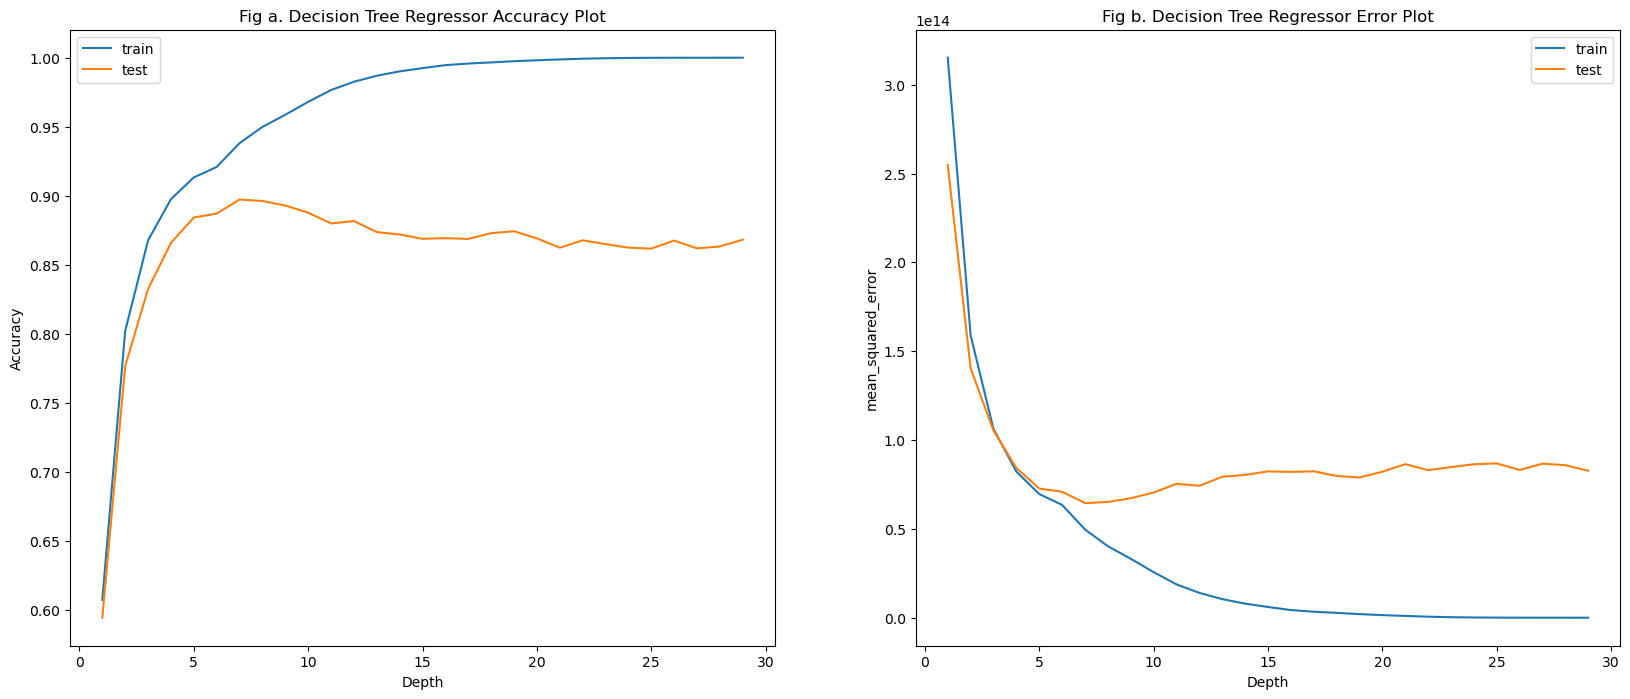

In [73]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
depth = np.arange(1,30)
acc_test_dtr = []
acc_train_dtr = []

loss_test_dtr = []
loss_train_dtr = []

for i in depth:
    dtr = tree.DecisionTreeRegressor(random_state=42, max_depth=i)
    dtr.fit(X_train, y_train)
    dtr_predict_train = dtr.predict(X_train)
    dtr_predict_test = dtr.predict(X_test)
    # dt_Accuracy = score(y_test, dt_predict)
    dtr_Accuracy_train = dtr.score(X_train,y_train)
    dtr_Accuracy_test = dtr.score(X_test,y_test)
    
#     print("Accuracy: " + str(dt_Accuracy))
    acc_train_dtr.append(dtr_Accuracy_train)
    acc_test_dtr.append(dtr_Accuracy_test)
    
    
    loss_train_dtr.append(mean_squared_error(y_train,dtr_predict_train))
    loss_test_dtr.append(mean_squared_error(y_test,dtr_predict_test))

# print(acc_train)
fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(depth,acc_train_dtr,label = 'train')
ax[0].plot(depth,acc_test_dtr,label = 'test')
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Fig a. Decision Tree Regressor Accuracy Plot')
ax[0].legend()


ax[1].plot(depth,loss_train_dtr,label = 'train')
ax[1].plot(depth,loss_test_dtr,label = 'test')
ax[1].set_xlabel('Depth')
ax[1].set_ylabel('mean_squared_error')
ax[1].set_title('Fig b. Decision Tree Regressor Error Plot')
ax[1].legend()
fig.savefig('DecisionTreeRegressorpopularityindex.pdf',bbox_inches = 'tight')

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
depth = np.arange(1,30)
acc_test_rfr = []
acc_train_rfr = []

loss_test_rfr = []
loss_train_rfr = []

for i in depth:
    rfr = RandomForestRegressor(random_state=42, max_depth=i)
    rfr.fit(X_train, y_train)
    rfr_predict_train = rfr.predict(X_train)
    rfr_predict_test = rfr.predict(X_test)
    # dt_Accuracy = score(y_test, dt_predict)
    rfr_Accuracy_train = rfr.score(X_train,y_train)
    rfr_Accuracy_test = rfr.score(X_test,y_test)
    
#     print("Accuracy: " + str(dt_Accuracy))
    acc_train_rfr.append(rfr_Accuracy_train)
    acc_test_rfr.append(rfr_Accuracy_test)
    
    
    loss_train_rfr.append(mean_squared_error(y_train,rfr_predict_train))
    loss_test_rfr.append(mean_squared_error(y_test,rfr_predict_test))

print(acc_train)


In [ ]:
fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0].plot(depth,acc_train_rfr,label = 'train')
ax[0].plot(depth,acc_test_rfr,label = 'test')
ax[0].set_xlabel('Depth')
ax[0].set_ylabel('Accuracy')
ax[0].set_title('Fig a. Random Forest Regressor Accuracy Plot')
ax[0].legend()


ax[1].plot(depth,loss_train_rfr,label = 'train')
ax[1].plot(depth,loss_test_rfr,label = 'test')
ax[1].set_xlabel('Depth')
ax[1].set_ylabel('mean_squared_error')
ax[1].set_title('Fig b. Random Forest Regressor Error Plot')
ax[1].legend()
fig.suptitle('Random Forest Regressor to predict popularity score of a track')
fig.savefig('RandomForestregressorpopularityindex.jpeg',bbox_inches = 'tight')
plt.show()

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=6)
rfr.fit(X_train, y_train)
rfr_predict_train = rfr.predict(X_train)
rfr_predict_test = rfr.predict(X_test)
# dt_Accuracy = score(y_test, dt_predict)
rfr_Accuracy_train = rfr.score(X_train,y_train)
rfr_Accuracy_test = rfr.score(X_test,y_test)
rfr_Accuracy_test

In [ ]:
fig,ax = plt.subplots(2,4,figsize = (25,10))
ax[0,0].plot(depth,acc_train_dt,label = 'train')
ax[0,0].plot(depth,acc_test_dt,label = 'test')
# ax[0,0].set_xlabel('Depth')
ax[0,0].set_ylabel('Accuracy')
ax[0,0].set_title('Fig a. Decision Tree Classifier Accuracy Plot')
ax[0,0].legend()


ax[0,1].plot(depth,loss_train_dt,label = 'train')
ax[0,1].plot(depth,loss_test_dt,label = 'test')
# ax[0,1].set_xlabel('Depth')
ax[0,1].set_ylabel('log_loss')
ax[0,1].set_title('Fig b. Decision Tree Classifier Error Plot')
ax[0,1].legend()
fig.suptitle('Training plot for different classification and regression techniques for predicting populartity',fontsize=20)
# plt.show()

# fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[0,2].plot(depth,acc_train_rf,label = 'train')
ax[0,2].plot(depth,acc_test_rf,label = 'test')
# ax[1,0].set_xlabel('Depth')
ax[0,2].set_ylabel('Accuracy')
ax[0,2].set_title('Fig c. Random Forest Classifier Accuracy Plot')
ax[0,2].legend()


ax[0,3].plot(depth,loss_train_rf,label = 'train')
ax[0,3].plot(depth,loss_test_rf,label = 'test')
# ax[1,1].set_xlabel('Depth')
ax[0,3].set_ylabel('log_loss')
ax[0,3].set_title('Fig d. Random Forest Classifier Error Plot')
ax[0,3].legend()
# fig.suptitle('Random Forest Classifier for predicting if the track is popular')

# plt.show()
# fig.savefig('RandomForestClassifierpopularitybinary.jpeg',bbox_inches = 'tight')

# print(acc_train)
# fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[1,0].plot(depth,acc_train_dtr,label = 'train')
ax[1,0].plot(depth,acc_test_dtr,label = 'test')
# ax[2,0].set_xlabel('Depth')
ax[1,0].set_ylabel('Accuracy')
ax[1,0].set_title('Fig e. Decision Tree Regressor Accuracy Plot')
ax[1,0].legend()


ax[1,1].plot(depth,loss_train_dtr,label = 'train')
ax[1,1].plot(depth,loss_test_dtr,label = 'test')
# ax[2,1].set_xlabel('Depth')
ax[1,1].set_ylabel('mean_squared_error')
ax[1,1].set_title('Fig f. Decision Tree Regressor Error Plot')
ax[1,1].legend()
# fig.suptitle('Random Forest Regressor to predict popularity score of a track')
# fig.savefig('DecisionTreeRegressorpopularityindex.pdf',bbox_inches = 'tight')

# fig,ax = plt.subplots(1,2,figsize = (20,8))
ax[1,2].plot(depth,acc_train_rfr,label = 'train')
ax[1,2].plot(depth,acc_test_rfr,label = 'test')
ax[1,2].set_xlabel('Depth')
ax[1,2].set_ylabel('Accuracy')
ax[1,2].set_title('Fig g. Random Forest Regressor Accuracy Plot')
ax[1,2].legend()


ax[1,3].plot(depth,loss_train_rfr,label = 'train')
ax[1,3].plot(depth,loss_test_rfr,label = 'test')
ax[1,3].set_xlabel('Depth')
ax[1,3].set_ylabel('mean_squared_error')
ax[1,3].set_title('Fig h. Random Forest Regressor Error Plot')
ax[1,3].legend()
# fig.suptitle('Random Forest Regressor to predict popularity score of a track')
# fig.savefig('RandomForestregressorpopularityindex.jpeg',bbox_inches = 'tight')

plt.show()

# plt.show()
fig.savefig('Popularity_accuracy_loss_plot.pdf',bbox_inches = 'tight')



In [ ]:
dtr = tree.DecisionTreeRegressor(random_state=42, max_depth=7)
dtr.fit(X_train, y_train)
dtr_predict_train = dtr.predict(X_train)
dtr_predict_test = dtr.predict(X_test)
dtr_Accuracy_train = dtr.score(X_train,y_train)
dtr_Accuracy_test = dtr.score(X_test,y_test)
dtr_Accuracy_test

In [ ]:
rfr = RandomForestRegressor(random_state=42, max_depth=8)
rfr.fit(X_train, y_train)
rfr_predict_train = rfr.predict(X_train)
rfr_predict_test = rfr.predict(X_test)
# dt_Accuracy = score(y_test, dt_predict)
rfr_Accuracy_train = rfr.score(X_train,y_train)
rfr_Accuracy_test = rfr.score(X_test,y_test)

In [ ]:
rfr_Accuracy_test

In [ ]:
from sklearn.linear_model import LinearRegression
clf = LinearRegression()
clf.fit(X_train, y_train)
clf_predict = clf.predict(X_test)
# dt_Accuracy = score(y_test, dt_predict)
clf_Accuracy = clf.score(X_test,y_test)
print("Accuracy: " + str(clf_Accuracy))

In [ ]:
fig,ax = plt.subplots(figsize = (10,5))
labels = ['Linear Regression','Decision Tree Regressor','Random Forest Regressor']
R2_values = [clf_Accuracy,dtr_Accuracy_test,rfr_Accuracy_test]

ax.bar(labels,R2_values, color = ['steelblue', 'lightcoral','darkseagreen'])
ax.set_xlabel('Models')
ax.set_ylabel('R2 Score')
fig.suptitle('R2 scores - Regression')
fig.savefig('R2_scores.pdf',bbox_inches = 'tight')

In [ ]:
fig,ax = plt.subplots(3,,figsize = (50,9))
labels = ['Naive Bayes','Decision Tree','Random Forest']
labels2 = ['Linear Regression','Decision Tree Regressor','Random Forest Regressor']
params = ['Fig a. Accuracy','Fig b. Precision','Fig c. Recall','Fig d. F1-Score','Fig e. AUC score']
precision = [nb_precision,dt_precision,rf_precision]
values = [[nb_accuracy,dt_accuracy,rf_accuracy],[nb_precision,dt_precision,rf_precision],[nb_recall,dt_recall,rf_recall],[nb_f1,dt_f1,rf_f1],[nb_auc,dt_auc,rf_auc]]
for i in range(6):
    if i == 5:
        ax[i].bar(labels2,values[i], color = ['steelblue', 'lightcoral','darkseagreen'])
    else:  
        ax[i].bar(labels,values[i], color = ['steelblue', 'lightcoral','darkseagreen'])
    ax[i].set_title(params[i],fontsize=25)
    ax[i].set_xlabel('Models',fontsize=20)
    ax[i].set_ylabel('Score',fontsize=20)
fig.suptitle('Popularity prediction scores',fontsize=30)
fig.savefig('Popularity_prediction_scores_Classification.pdf',bbox_inches = 'tight',fontweight="bold")